# Import and Reading of csv



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
mosq_csv = pd.read_csv('/content/drive/MyDrive/CMP466 - Machine Learning/Project/MTM_DISCRIMINATING_CONCENTRATION_BIOASSAY_MOD.csv')

Mounted at /content/drive/


In [ ]:
# mosq_csv = pd.read_csv('MTM_DISCRIMINATING_CONCENTRATION_BIOASSAY_MOD.csv')

# Preprocessing

In [ ]:
from collections import Counter
# Verify the class distribution
print("Class distribution before preprocessing:")
print(Counter(mosq_csv['RESISTANCE_STATUS']))

Class distribution before preprocessing:
Counter({'Confirmed resistance': 10112, 'Susceptible': 7568, 'Possible resistance': 2675, 'Undetermined': 719})


In [ ]:
mosq_csv.nunique()

ID                       21074
COUNTRY_NAME                87
ISO2                        86
ADMIN1                     721
ADMIN2                    1913
SITE_NAME                 3782
SITE_CODE                 3793
LATITUDE                  3624
LONGITUDE                 3635
ASSAY_TYPE                   1
TEST_TYPE                    3
INSECTICIDE_CLASS            6
INSECTICIDE_TYPE            18
INSECTICIDE_CONC            18
INSECTICIDE_INTENSITY        1
YEAR_START                  44
SPECIES                     92
STAGE_ORIGIN                 5
MOSQUITO_NUMBER            431
TEST_TIME                    0
MORTALITY_ADJUSTED        1594
RESISTANCE_STATUS            4
DATA_SOURCE                264
CITATION                   660
CITATION_URL               447
DATA_CURATOR                 3
dtype: int64

In [ ]:
labelsX = ['COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','ADMIN2','SITE_NAME','TEST_TYPE','INSECTICIDE_TYPE','INSECTICIDE_CONC', 'MOSQUITO_NUMBER','SPECIES']

mosq_csv_ = mosq_csv[labelsX + ['RESISTANCE_STATUS']]
# mosq_csv_Y=mosq_csv['RESISTANCE_STATUS']

print(mosq_csv_.nunique())
# print(mosq_csv_Y.nunique())

COUNTRY_NAME           87
INSECTICIDE_CLASS       6
ADMIN1                721
ADMIN2               1913
SITE_NAME            3782
TEST_TYPE               3
INSECTICIDE_TYPE       18
INSECTICIDE_CONC       18
MOSQUITO_NUMBER       431
SPECIES                92
RESISTANCE_STATUS       4
dtype: int64


In [ ]:
mosq_csv_ = mosq_csv_.replace(['', 'Not available', 'Undetermined'],np.NaN)

In [ ]:
mosq_csv_.count()

COUNTRY_NAME         21074
INSECTICIDE_CLASS    21074
ADMIN1               21018
ADMIN2               21018
SITE_NAME            21074
TEST_TYPE            21074
INSECTICIDE_TYPE     21074
INSECTICIDE_CONC     21074
MOSQUITO_NUMBER      18620
SPECIES              21074
RESISTANCE_STATUS    20355
dtype: int64

In [ ]:
mosq_csv_.isnull().sum()

COUNTRY_NAME            0
INSECTICIDE_CLASS       0
ADMIN1                 56
ADMIN2                 56
SITE_NAME               0
TEST_TYPE               0
INSECTICIDE_TYPE        0
INSECTICIDE_CONC        0
MOSQUITO_NUMBER      2454
SPECIES                 0
RESISTANCE_STATUS     719
dtype: int64

In [ ]:
mosq_csv_ = mosq_csv_.dropna()
mosq_csv_.dtypes

COUNTRY_NAME         object
INSECTICIDE_CLASS    object
ADMIN1               object
ADMIN2               object
SITE_NAME            object
TEST_TYPE            object
INSECTICIDE_TYPE     object
INSECTICIDE_CONC     object
MOSQUITO_NUMBER      object
SPECIES              object
RESISTANCE_STATUS    object
dtype: object

In [ ]:
mosq_csv_.count()

COUNTRY_NAME         17880
INSECTICIDE_CLASS    17880
ADMIN1               17880
ADMIN2               17880
SITE_NAME            17880
TEST_TYPE            17880
INSECTICIDE_TYPE     17880
INSECTICIDE_CONC     17880
MOSQUITO_NUMBER      17880
SPECIES              17880
RESISTANCE_STATUS    17880
dtype: int64

In [ ]:
mosq_csv_.isnull().sum()

COUNTRY_NAME         0
INSECTICIDE_CLASS    0
ADMIN1               0
ADMIN2               0
SITE_NAME            0
TEST_TYPE            0
INSECTICIDE_TYPE     0
INSECTICIDE_CONC     0
MOSQUITO_NUMBER      0
SPECIES              0
RESISTANCE_STATUS    0
dtype: int64

In [ ]:
# Verify the class distribution
print("Class distribution after preprocessing:")
print(Counter(mosq_csv_['RESISTANCE_STATUS']))

Class distribution after preprocessing:
Counter({'Confirmed resistance': 8918, 'Susceptible': 6649, 'Possible resistance': 2313})


# Creating two datasets: With ranges(took the median) and Without ranges(removed the ranges)

In [ ]:
ranges_mosq = mosq_csv_.copy()

# Filter rows with ~100 and ranges
selected_rows = mosq_csv_[
    mosq_csv_['MOSQUITO_NUMBER'].str.startswith('~') | mosq_csv_['MOSQUITO_NUMBER'].str.contains('-')
]

# Process ~100 values and ranges
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')  # Remove ~ from ~100
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('-', ' ').astype(str)  # Replace '-' with ' '
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.split().apply(lambda x: sum(map(float, x))/len(x))  # Calculate median for ranges

# Update the original DataFrame with the processed rows
ranges_mosq['MOSQUITO_NUMBER'].update(selected_rows['MOSQUITO_NUMBER'])

<ipython-input-14-abd3d9f74844>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')  # Remove ~ from ~100
<ipython-input-14-abd3d9f74844>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('-', ' ').astype(str)  # Replace '-' with ' '
<ipython-input-14-abd3d9f74844>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
print("\nDataframe with ranges:")
print(ranges_mosq['MOSQUITO_NUMBER'].tail(5))
print(ranges_mosq.count())


Dataframe with ranges:
21069    100
21070    100
21071     48
21072     40
21073     40
Name: MOSQUITO_NUMBER, dtype: object
COUNTRY_NAME         17880
INSECTICIDE_CLASS    17880
ADMIN1               17880
ADMIN2               17880
SITE_NAME            17880
TEST_TYPE            17880
INSECTICIDE_TYPE     17880
INSECTICIDE_CONC     17880
MOSQUITO_NUMBER      17880
SPECIES              17880
RESISTANCE_STATUS    17880
dtype: int64


In [ ]:
# Filter rows without ~100 and ranges
values_mosq = mosq_csv_[~mosq_csv_['MOSQUITO_NUMBER'].str.contains('-')]
# Filter rows ~100
selected_rows = mosq_csv_[mosq_csv_['MOSQUITO_NUMBER'].str.startswith('~') ]

# Process ~100 values and ranges
selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')

# Update the original DataFrame with the processed rows
values_mosq['MOSQUITO_NUMBER'].update(selected_rows['MOSQUITO_NUMBER'])

<ipython-input-16-6ad2c1a32fbe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['MOSQUITO_NUMBER'] = selected_rows['MOSQUITO_NUMBER'].str.replace('~', '')
<ipython-input-16-6ad2c1a32fbe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_mosq['MOSQUITO_NUMBER'].update(selected_rows['MOSQUITO_NUMBER'])


In [ ]:
print("\nDataframe with values:")
print('~100' in values_mosq['MOSQUITO_NUMBER'].values)
print(values_mosq.count())


Dataframe with values:
False
COUNTRY_NAME         17646
INSECTICIDE_CLASS    17646
ADMIN1               17646
ADMIN2               17646
SITE_NAME            17646
TEST_TYPE            17646
INSECTICIDE_TYPE     17646
INSECTICIDE_CONC     17646
MOSQUITO_NUMBER      17646
SPECIES              17646
RESISTANCE_STATUS    17646
dtype: int64


In [ ]:
# Check which rows contain 'µg' in the INSECTICIDE_CONC column
contains_microgram_v = values_mosq['INSECTICIDE_CONC'].str.contains('µg')
contains_microgram_r = ranges_mosq['INSECTICIDE_CONC'].str.contains('µg')

# Invert the boolean mask to select rows that do not contain 'µg'
rows_to_keep_v = ~contains_microgram_v
rows_to_keep_r = ~contains_microgram_r

# Filter the DataFrame to keep only the rows without 'µg' in the INSECTICIDE_CONC column
values_mosq = values_mosq[rows_to_keep_v]
ranges_mosq = ranges_mosq[rows_to_keep_r]

In [ ]:
def convert_percentage_to_number(percentage):
    if pd.isna(percentage):  # Check if the value is NaN
        return None
    else:
        return float(percentage.strip('%')) / 100  # Convert percentage to number

# Apply the function to the 'INSECTICIDE_CONC' column
values_mosq['INSECTICIDE_CONC'] = values_mosq['INSECTICIDE_CONC'].apply(convert_percentage_to_number)
ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].apply(convert_percentage_to_number)

In [ ]:
print(ranges_mosq['INSECTICIDE_CONC'].head(20))

0     0.0010
2     0.0005
4     0.0005
8     0.0005
9     0.0400
11    0.0005
12    0.0010
13    0.0075
14    0.0075
15    0.0075
18    0.0400
20    0.0075
23    0.0400
24    0.0005
26    0.0050
27    0.0400
28    0.0100
29    0.0500
30    0.0400
31    0.0005
Name: INSECTICIDE_CONC, dtype: float64


In [ ]:
print(values_mosq['INSECTICIDE_CONC'].head(20))

0     0.0010
2     0.0005
4     0.0005
8     0.0005
9     0.0400
11    0.0005
12    0.0010
13    0.0075
14    0.0075
15    0.0075
18    0.0400
20    0.0075
23    0.0400
24    0.0005
26    0.0050
27    0.0400
28    0.0100
29    0.0500
30    0.0400
31    0.0005
Name: INSECTICIDE_CONC, dtype: float64


In [ ]:
values_mosq['MOSQUITO_NUMBER'] = values_mosq['MOSQUITO_NUMBER'].astype('float64')
values_mosq['INSECTICIDE_CONC'] = values_mosq['INSECTICIDE_CONC'].astype('float64')

ranges_mosq['MOSQUITO_NUMBER'] = ranges_mosq['MOSQUITO_NUMBER'].astype('float64')
ranges_mosq['INSECTICIDE_CONC'] = ranges_mosq['INSECTICIDE_CONC'].astype('float64')


In [ ]:
values_mosq.dtypes

COUNTRY_NAME          object
INSECTICIDE_CLASS     object
ADMIN1                object
ADMIN2                object
SITE_NAME             object
TEST_TYPE             object
INSECTICIDE_TYPE      object
INSECTICIDE_CONC     float64
MOSQUITO_NUMBER      float64
SPECIES               object
RESISTANCE_STATUS     object
dtype: object

In [ ]:
ranges_mosq.dtypes

COUNTRY_NAME          object
INSECTICIDE_CLASS     object
ADMIN1                object
ADMIN2                object
SITE_NAME             object
TEST_TYPE             object
INSECTICIDE_TYPE      object
INSECTICIDE_CONC     float64
MOSQUITO_NUMBER      float64
SPECIES               object
RESISTANCE_STATUS     object
dtype: object

- Removing MORTALITY_ADJUSTED range values
- Removing NaNs and Not Availables
- Removing ug values from INSECTICIDE_CONC

MORTALITY_ADJUSTED RANGE TYPICALLY
1. 98 to 100 = Susceptible
2. 90 to 98 = Possible Resistance
3. Remaining is Confirmed Resistance

DATASET
- With ranges in MOSQUITO_NUMBER
- Without ranges in MOSQUITO_NUMBER

# Encoding & Oversampling

In [ ]:
def encode_categorical_columns(df, columns):
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        encoded_values = encoder.fit_transform(df[column])
        df[column] = encoded_values
        encoders[column] = encoder
    return df, encoders

In [ ]:
columns_to_encode = ['RESISTANCE_STATUS','COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','TEST_TYPE','ADMIN2','SITE_NAME','INSECTICIDE_TYPE','SPECIES']

values_mosq, encoders_v = encode_categorical_columns(values_mosq.copy(), columns_to_encode)

ranges_mosq, encoders_r = encode_categorical_columns(ranges_mosq.copy(), columns_to_encode)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import pandas as pd

# Calculate the number of samples in class 0
class_0_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 0])

# Calculate the number of samples in class 2
class_2_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 2])

# Define the oversampling strategy for class 1
oversample_strategy = {1: class_2_count}

# Define the undersampling strategy for class 0
undersample_strategy = {0: class_2_count}

# Define the SMOTE object
oversampler = SMOTE(sampling_strategy=oversample_strategy)

# Define the RandomUnderSampler object
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Define the pipeline
pipeline = Pipeline([
    ('under', undersampler),
    ('over', oversampler),
])

# Apply the pipeline to the dataframe
X_resampled, y_resampled = pipeline.fit_resample(ranges_mosq.drop(columns=['RESISTANCE_STATUS']), ranges_mosq['RESISTANCE_STATUS'])

# Combine X_resampled and y_resampled into a new DataFrame
ranges_mosq = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['RESISTANCE_STATUS'])], axis=1)

# Verify the class distribution
print("Class distribution after resampling:")
print(Counter(ranges_mosq['RESISTANCE_STATUS']))

Class distribution after resampling:
Counter({0: 6118, 1: 6118, 2: 6118})


In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from collections import Counter
# import pandas as pd

# # Calculate the number of samples in class 0
# class_0_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 0])

# # Calculate the number of samples in class 2
# class_2_count = len(ranges_mosq[ranges_mosq['RESISTANCE_STATUS'] == 2])

# # Define the oversampling strategy for class 1
# oversample_strategy = {1: class_2_count}

# # Define the undersampling strategy for class 0
# undersample_strategy = {0: class_2_count}

# # Define the SMOTE object
# oversampler = SMOTE(sampling_strategy=oversample_strategy)

# # Define the RandomUnderSampler object
# undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy)

# # Define the pipeline
# pipeline = Pipeline([
#     ('under', undersampler),
#     ('over', oversampler),
# ])

# # Apply the pipeline to the dataframe
# X_resampled, y_resampled = pipeline.fit_resample(ranges_mosq.drop(columns=['RESISTANCE_STATUS']), ranges_mosq['RESISTANCE_STATUS'])

# # Combine X_resampled and y_resampled into a new DataFrame
# resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['RESISTANCE_STATUS'])], axis=1)

# # Verify the class distribution
# print("Class distribution after resampling:")
# print(Counter(resampled_df['RESISTANCE_STATUS']))


In [ ]:
# Display the updated DataFrame
print("\nUpdated DataFrame:")
# ranges_mosq=resampled_df.copy()
print(ranges_mosq[['RESISTANCE_STATUS', 'COUNTRY_NAME', 'INSECTICIDE_CLASS', 'INSECTICIDE_TYPE','SPECIES']].head(20))


Updated DataFrame:
    RESISTANCE_STATUS  COUNTRY_NAME  INSECTICIDE_CLASS  INSECTICIDE_TYPE  \
0                   0            13                  3                 6   
1                   0            62                  3                 6   
2                   0            77                  3                12   
3                   0            14                  2                11   
4                   0            62                  3                10   
5                   0             7                  3                12   
6                   0            43                  3                 0   
7                   0            69                  3                12   
8                   0            26                  3                10   
9                   0            34                  0                 1   
10                  0            34                  3                 6   
11                  0            69                  3              

# Seperating Values_mosq & Ranges_mosq into target and predictor dataframes

In [ ]:
labelsX = ['COUNTRY_NAME', 'INSECTICIDE_CLASS','ADMIN1','TEST_TYPE','ADMIN2','SITE_NAME','INSECTICIDE_TYPE','INSECTICIDE_CONC', 'MOSQUITO_NUMBER','SPECIES']

values_mosq_X = values_mosq[labelsX]
values_mosq_Y=values_mosq['RESISTANCE_STATUS']

ranges_mosq_X = ranges_mosq[labelsX]
ranges_mosq_Y=ranges_mosq['RESISTANCE_STATUS']

In [ ]:
print(values_mosq_X.nunique())
print(values_mosq_Y.nunique())

COUNTRY_NAME           81
INSECTICIDE_CLASS       4
ADMIN1                651
TEST_TYPE               2
ADMIN2               1679
SITE_NAME            3225
INSECTICIDE_TYPE       15
INSECTICIDE_CONC       11
MOSQUITO_NUMBER       405
SPECIES                86
dtype: int64
3


In [ ]:
print(ranges_mosq_X.nunique())
print(ranges_mosq_Y.nunique())

COUNTRY_NAME           81
INSECTICIDE_CLASS       4
ADMIN1                651
TEST_TYPE               2
ADMIN2               1678
SITE_NAME            3213
INSECTICIDE_TYPE       15
INSECTICIDE_CONC     2501
MOSQUITO_NUMBER      3300
SPECIES                86
dtype: int64
3


In [ ]:
values_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,TEST_TYPE,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES
count,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000
mean,42.178911,2.182378,322.868671,0.999821,851.963477,1569.463148,7.013988,0.012338,98.206180,31.104071
std,24.063114,1.107682,179.473293,0.013391,471.938075,912.338574,3.686244,0.017741,86.490532,21.570439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,11.000000,0.000000
25%,19.000000,1.000000,170.000000,1.000000,457.000000,776.000000,5.000000,0.000500,75.000000,14.000000
50%,38.000000,3.000000,324.000000,1.000000,831.000000,1541.000000,6.000000,0.001000,100.000000,29.000000
75%,67.000000,3.000000,469.000000,1.000000,1262.000000,2328.000000,10.000000,0.010000,100.000000,30.000000
max,80.000000,3.000000,650.000000,1.000000,1678.000000,3224.000000,14.000000,0.050000,2899.000000,85.000000


In [ ]:
values_mosq_Y.describe()

count    16729.000000
mean         0.851276
std          0.921019
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          2.000000
Name: RESISTANCE_STATUS, dtype: float64

In [ ]:
ranges_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,TEST_TYPE,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES
count,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000
mean,42.820366,2.124115,322.225564,0.999837,854.628201,1586.018361,6.912226,0.011957,96.703764,31.200937
std,23.584651,1.109277,177.564445,0.012784,472.633997,919.023457,3.571178,0.017064,81.788126,21.349894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,11.000000,0.000000
25%,26.000000,1.000000,170.000000,1.000000,462.000000,796.000000,5.000000,0.000500,75.000000,14.000000
50%,40.000000,3.000000,324.000000,1.000000,829.000000,1559.000000,6.000000,0.001000,100.000000,29.000000
75%,67.000000,3.000000,469.000000,1.000000,1263.000000,2356.000000,10.000000,0.010502,100.000000,35.000000
max,80.000000,3.000000,650.000000,1.000000,1686.000000,3250.000000,14.000000,0.050000,2899.000000,85.000000


In [ ]:
ranges_mosq_Y.describe()

count    18354.000000
mean         1.000000
std          0.816519
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: RESISTANCE_STATUS, dtype: float64

# Scaling

In [ ]:
# Select the columns to be normalized
columns_to_normalize = ['INSECTICIDE_CONC', 'MOSQUITO_NUMBER']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
values_mosq_X[columns_to_normalize] = scaler.fit_transform(values_mosq_X[columns_to_normalize])
ranges_mosq_X[columns_to_normalize] = scaler.fit_transform(ranges_mosq_X[columns_to_normalize])


<ipython-input-37-9cf635af68eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values_mosq_X[columns_to_normalize] = scaler.fit_transform(values_mosq_X[columns_to_normalize])
<ipython-input-37-9cf635af68eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranges_mosq_X[columns_to_normalize] = scaler.fit_transform(ranges_mosq_X[columns_to_normalize])


In [ ]:
values_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,TEST_TYPE,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES
count,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000
mean,42.178911,2.182378,322.868671,0.999821,851.963477,1569.463148,7.013988,0.239150,0.030196,31.104071
std,24.063114,1.107682,179.473293,0.013391,471.938075,912.338574,3.686244,0.358410,0.029948,21.570439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,170.000000,1.000000,457.000000,776.000000,5.000000,0.000000,0.022161,14.000000
50%,38.000000,3.000000,324.000000,1.000000,831.000000,1541.000000,6.000000,0.010101,0.030817,29.000000
75%,67.000000,3.000000,469.000000,1.000000,1262.000000,2328.000000,10.000000,0.191919,0.030817,30.000000
max,80.000000,3.000000,650.000000,1.000000,1678.000000,3224.000000,14.000000,1.000000,1.000000,85.000000


In [ ]:
ranges_mosq_X.describe()

,COUNTRY_NAME,INSECTICIDE_CLASS,ADMIN1,TEST_TYPE,ADMIN2,SITE_NAME,INSECTICIDE_TYPE,INSECTICIDE_CONC,MOSQUITO_NUMBER,SPECIES
count,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000
mean,42.820366,2.124115,322.225564,0.999837,854.628201,1586.018361,6.912226,0.231455,0.029676,31.200937
std,23.584651,1.109277,177.564445,0.012784,472.633997,919.023457,3.571178,0.344723,0.028320,21.349894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,170.000000,1.000000,462.000000,796.000000,5.000000,0.000000,0.022161,14.000000
50%,40.000000,3.000000,324.000000,1.000000,829.000000,1559.000000,6.000000,0.010101,0.030817,29.000000
75%,67.000000,3.000000,469.000000,1.000000,1263.000000,2356.000000,10.000000,0.202056,0.030817,35.000000
max,80.000000,3.000000,650.000000,1.000000,1686.000000,3250.000000,14.000000,1.000000,1.000000,85.000000


# Dimensionality reduction & Feature selection

<Axes: >

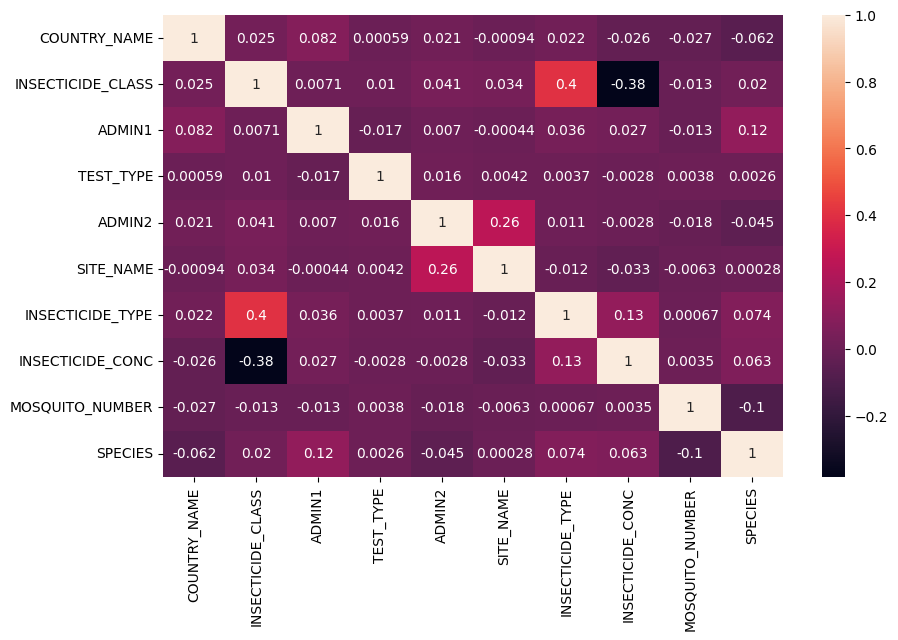

In [ ]:
cor=ranges_mosq_X.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [ ]:
# column_drop=['ASSAY_TYPE','TEST_TYPE']
# values_mosq_X=values_mosq_X.drop(columns=column_drop)
# ranges_mosq_X=ranges_mosq_X.drop(columns=column_drop)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(ranges_mosq_X, ranges_mosq_Y)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{ranges_mosq_X.columns[i]}': Mutual Information Score = {score}")

Feature 'COUNTRY_NAME': Mutual Information Score = 0.2049468255705147
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.20317681891155126
Feature 'ADMIN1': Mutual Information Score = 0.17961662203448636
Feature 'TEST_TYPE': Mutual Information Score = 0.12379483983697082
Feature 'ADMIN2': Mutual Information Score = 0.08930188956720353
Feature 'SITE_NAME': Mutual Information Score = 0.03708693210387426
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.035528397863443306
Feature 'INSECTICIDE_CONC': Mutual Information Score = 0.03096185785305705
Feature 'MOSQUITO_NUMBER': Mutual Information Score = 0.023106445288743505
Feature 'SPECIES': Mutual Information Score = 0.005098847541822771


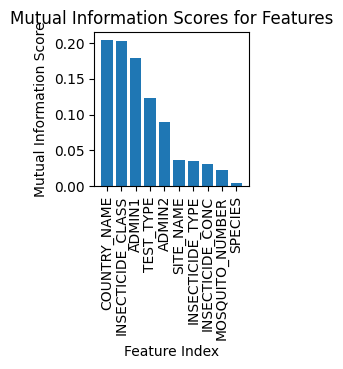

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 2))
plt.bar(range(len(mi_scores)), sorted(mi_scores, reverse=True))
plt.xlabel('Feature Index')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.xticks(range(len(mi_scores)), ranges_mosq_X.columns, rotation=90)

plt.show()


# ranges_mosq_X=ranges_mosq_X[['COUNTRY_NAME','INSECTICIDE_CLASS','ADMIN1','ADMIN2']]
# ranges_mosq_X.head()

In [ ]:
# Applying PCA to reduce dimensionality while retaining 95% of the variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
ranges_mosq_X_pca = pca.fit_transform(ranges_mosq_X)

# The number of components chosen by PCA
n_components = pca.n_components_
print(f"PCA reduced the feature space to {n_components} components.")

# Get the selected components
selected_components = pca.components_

# Get the names of the original features
feature_names = ranges_mosq_X.columns

# Loop through each principal component to find the top features
for i, component in enumerate(selected_components):
    print(f"Top features for Principal Component {i+1}:")
    # Sort the indices of the features by their absolute coefficient values
    top_feature_indices = sorted(range(len(component)), key=lambda x: abs(component[x]), reverse=True)
    # Print the names of the top features
    for idx in top_feature_indices:
        print(f"{feature_names[idx]}: {component[idx]}")
    print()




PCA reduced the feature space to 2 components.
Top features for Principal Component 1:
SITE_NAME: 0.9868698530274144
ADMIN2: 0.16151169637282423
ADMIN1: 0.001352652684146416
COUNTRY_NAME: -0.00012576793834241122
SPECIES: -0.0001104841343397174
INSECTICIDE_CLASS: 6.700277474047667e-05
INSECTICIDE_TYPE: -5.150986655491575e-05
INSECTICIDE_CONC: -1.6855914448704422e-05
MOSQUITO_NUMBER: -2.4535896388744544e-07
TEST_TYPE: 5.709001149202702e-09

Top features for Principal Component 2:
ADMIN2: -0.986779913072663
SITE_NAME: 0.16151508389817495
ADMIN1: -0.013083426181932645
SPECIES: 0.0025331333209867475
COUNTRY_NAME: -0.0008175533675896932
INSECTICIDE_TYPE: -0.00013580046938008617
INSECTICIDE_CLASS: -3.276336441954131e-05
INSECTICIDE_CONC: -1.0666683775528002e-05
MOSQUITO_NUMBER: 1.416136432240642e-06
TEST_TYPE: -3.081402220004867e-07



In [ ]:
ranges_mosq_X_pca

array([[ 336.6749362 , -607.40895583],
       [-658.61096844,  217.42481702],
       [-257.10411772,   83.91440803],
       ...,
       [ 636.92217918, -353.73269424],
       [1608.40495329,  213.04717041],
       [-892.13712723, -886.54598356]])

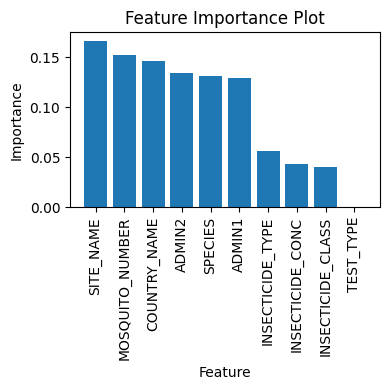

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42)
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances and feature names in descending order of importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(4, 4))
plt.bar(range(len(feature_names)), sorted_feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(range(len(feature_names)), sorted_feature_names, rotation=90)
plt.tight_layout()
plt.show()

# Class Divisions

Class Distribution (Counts):
RESISTANCE_STATUS
0    6118
1    6118
2    6118
Name: count, dtype: int64

Class Distribution (Percentage):
RESISTANCE_STATUS
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64


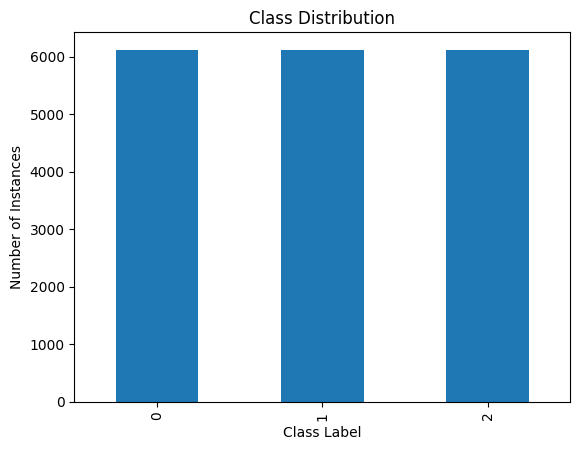

In [ ]:
# Display the distribution of the target variable in counts
class_distribution = ranges_mosq_Y.value_counts()
print("Class Distribution (Counts):")
print(class_distribution)

# Display the distribution of the target variable in percentages
class_distribution_percentage = ranges_mosq_Y.value_counts(normalize=True) * 100
print("\nClass Distribution (Percentage):")
print(class_distribution_percentage)

import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', title='Class Distribution')
plt.ylabel('Number of Instances')
plt.xlabel('Class Label')
plt.show()

# Training values_csv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(values_mosq_X, values_mosq_Y, test_size=0.30, random_state=42)

In [ ]:
# KNN
knn_params = {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']})

In [ ]:
dt_params = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 15, None], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': list(range(2,10))}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=2, verbose = 10, n_jobs = -1)
dt_grid.fit(X_train, y_train)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 15, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=10)

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

In [ ]:
# SVM with linear kernel
svm_linear_params = {'C': [0.1, 1, 10]}
svm_linear_grid = GridSearchCV(SVC(kernel='linear'), svm_linear_params, cv=5)
svm_linear_grid.fit(X_train, y_train)

In [ ]:
# SVM with non-linear kernel (RBF)
svm_rbf_params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf'), svm_rbf_params, cv=5)
svm_rbf_grid.fit(X_train, y_train)

# Model Evaluation for values_csv


In [ ]:
# Function to evaluate the model
def evaluate_multiclass_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    n_classes = y_test.nunique()

    # Compute one-hot encoding for y_test and y_pred
    y_test_one_hot = label_binarize(y_test, classes=list(range(n_classes)))
    y_pred_one_hot = label_binarize(y_pred, classes=list(range(n_classes)))

    # Compute multiclass AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    tpr_macro = np.zeros_like(fpr_macro)
    for i in range(n_classes):
        tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
    tpr_macro /= n_classes
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    # Compute accuracy, F1-score, precision, recall, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC ROC (Macro)': roc_auc_macro,
        'AUC ROC (Per Class)': roc_auc,
        'ROC Curve (Macro)': (fpr_macro, tpr_macro),
        'Confusion Matrix': conf_matrix
    }


In [ ]:
# Evaluating each model
dt_evaluation_v = evaluate_multiclass_model(dt_grid.best_estimator_, X_test, y_test)
# knn_evaluation_v = evaluate_multiclass_model(knn_grid.best_estimator_, X_test, y_test)
# nb_evaluation_v = evaluate_multiclass_model(nb_model, X_test, y_test) # Naive Bayes does not use predict_proba or decision_function
# svm_linear_evaluation_v = evaluate_multiclass_model(svm_linear_grid.best_estimator_, X_test, y_test)
# svm_rbf_evaluation_v = evaluate_multiclass_model(svm_rbf_grid.best_estimator_, X_test, y_test)

In [ ]:
# Initialize set for unique hyperparameters
unique_hyperparameters = set()

# Initialize list for unique top models based on mean test score
unique_top_model_indices = []

# Set a threshold for minimum difference in performance to consider
performance_threshold = 0.0001  # e.g., 1% difference


# Get the results of the grid search
results = dt_grid.cv_results_

# Get the sorted scores and indices
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'][sorted_indices]

# Loop over sorted scores and indices to find unique top models
# Loop over sorted scores and indices to find unique top models
for idx, score in zip(sorted_indices, sorted_scores):
    params = results['params'][idx]
    # Convert hyperparameters to a frozenset for uniqueness checking
    params_frozen = frozenset(params.items())
    # Check if this combination of hyperparameters is unique and differs from the next by the threshold
    if params_frozen not in unique_hyperparameters and \
       (len(unique_top_model_indices) == 0 or score <= sorted_scores[unique_top_model_indices[-1]] - performance_threshold):
        unique_hyperparameters.add(params_frozen)
        unique_top_model_indices.append(idx)
        # Break if we have found the desired number of unique models
        if len(unique_top_model_indices) >= 5:
            break


# Now unique_top_model_indices contains indices of unique models
# Continue with your plotting code using unique_top_model_indices


In [ ]:
# Print indices and hyperparameters
print("Indices of unique models:", unique_top_model_indices)
print("Hyperparameters of unique models:")
for idx in unique_top_model_indices:
    print(results['params'][idx])

Indices of unique models: [300, 10, 17, 16, 15]
Hyperparameters of unique models:
{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6}
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [ ]:
clf_initial = DecisionTreeClassifier(random_state=42)
clf_initial.fit(X_train, y_train)
y_pred_initial = clf_initial.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred_initial))

Initial Model Performance:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2588
           1       0.29      0.21      0.25       635
           2       0.73      0.71      0.72      1802

    accuracy                           0.71      5025
   macro avg       0.60      0.59      0.59      5025
weighted avg       0.69      0.71      0.70      5025



In [ ]:
dt_best_params_v = dt_grid.best_params_
print(f"Decision Tree best params: {dt_best_params_v}")
print("Decision Tree Evaluation:", dt_evaluation_v)

Decision Tree best params: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6}
Decision Tree Evaluation: {'Accuracy': 0.7132338308457712, 'F1 Score': 0.5724751674674922, 'Precision': 0.5891954912133778, 'Recall': 0.5725626380759788, 'AUC ROC (Macro)': 0.7877399150238537, 'AUC ROC (Per Class)': {0: 0.8512099180650697, 1: 0.6542056929671946, 2: 0.8577828165553977}, 'ROC Curve (Macro)': (array([0.        , 0.00341686, 0.00387244, 0.0047836 , 0.00865604,
       0.00888383, 0.02482916, 0.02528474, 0.02551253, 0.02854483,
       0.02916537, 0.02947564, 0.03071672, 0.03120729, 0.0319578 ,
       0.03381942, 0.03439636, 0.03568104, 0.03621868, 0.03667426,
       0.03692212, 0.03878374, 0.04033509, 0.04064536, 0.0414444 ,
       0.04185474, 0.04188644, 0.04226508, 0.04267542, 0.04312752,
       0.04343779, 0.04431678, 0.0455478 , 0.04636849, 0.04654049,
       0.04677883, 0.04718917, 0.0474713 , 0.04965121, 0.05252359,
       0.05330296, 0.05416496, 0.0545753 , 0.05489749, 0.055538

Model 1 Metrics:
   F1 Score: 0.6963
   Testing Accuracy: 0.7150
   Training Accuracy: 0.8005
   Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 6}
Model 2 Metrics:
   F1 Score: 0.5398
   Testing Accuracy: 0.5879
   Training Accuracy: 0.5875
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
Model 3 Metrics:
   F1 Score: 0.5398
   Testing Accuracy: 0.5879
   Training Accuracy: 0.5875
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}
Model 4 Metrics:
   F1 Score: 0.5398
   Testing Accuracy: 0.5879
   Training Accuracy: 0.5875
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Model 5 Metrics:
   F1 Score: 0.5398
   Testing Accuracy: 0.5879
   Training Accuracy: 0.5875
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 9}


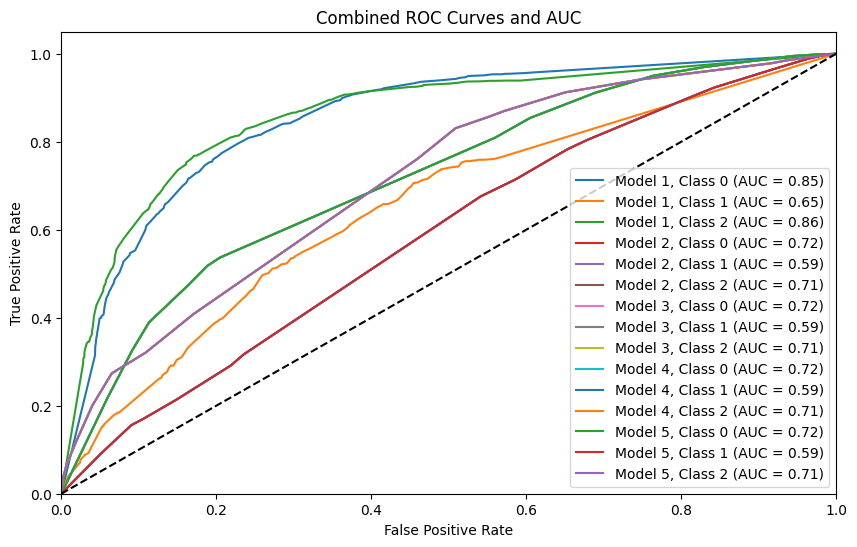

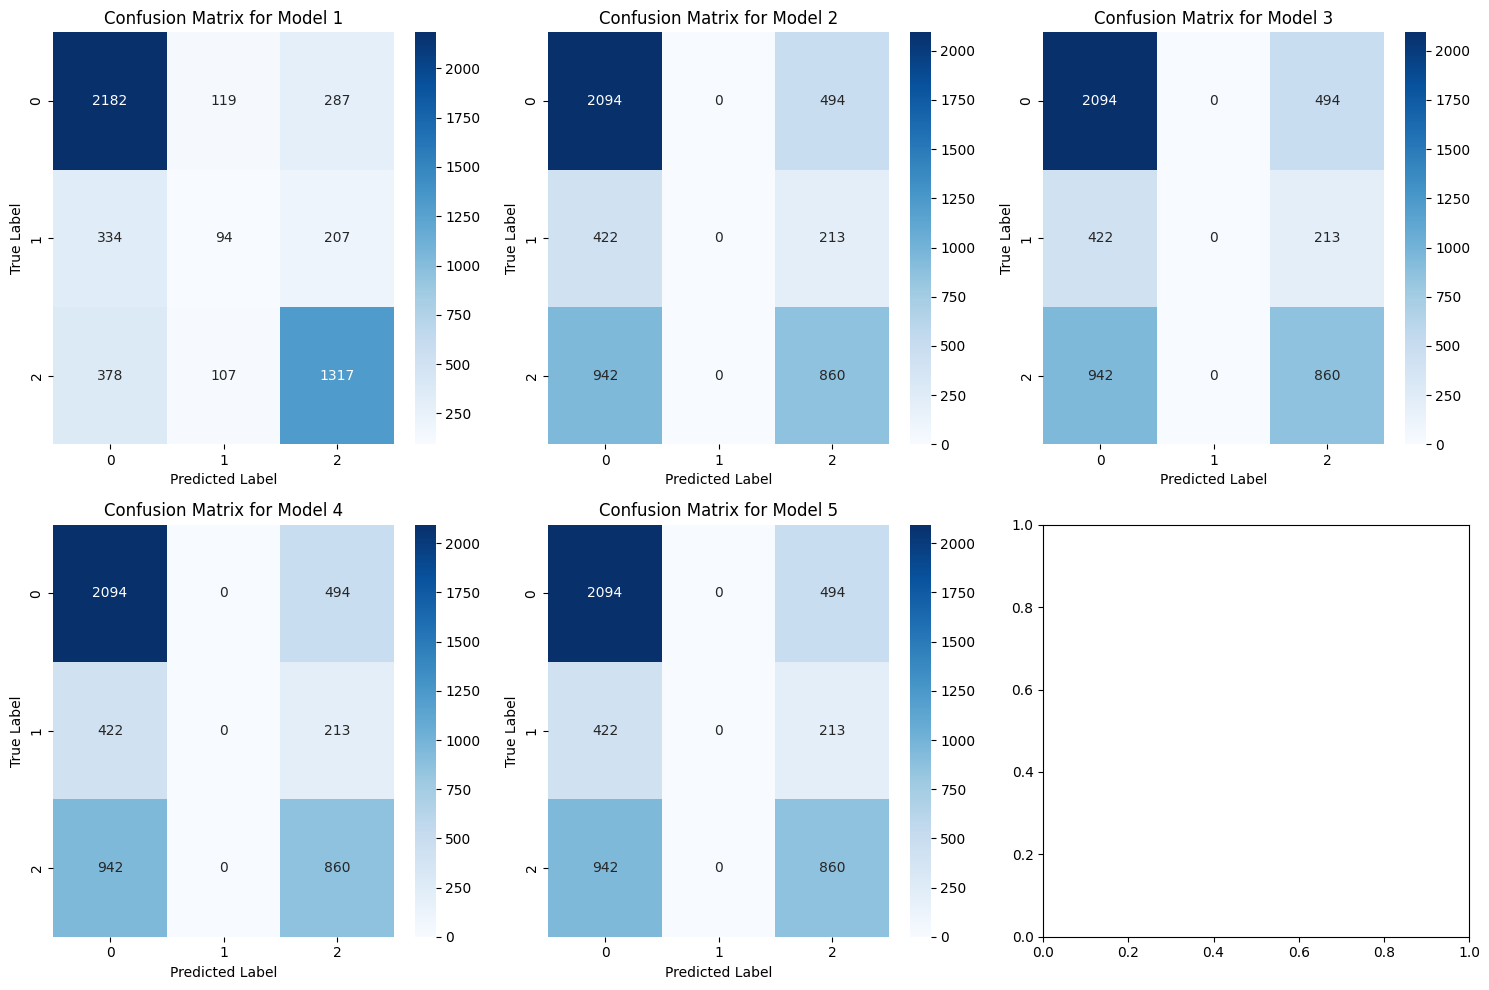

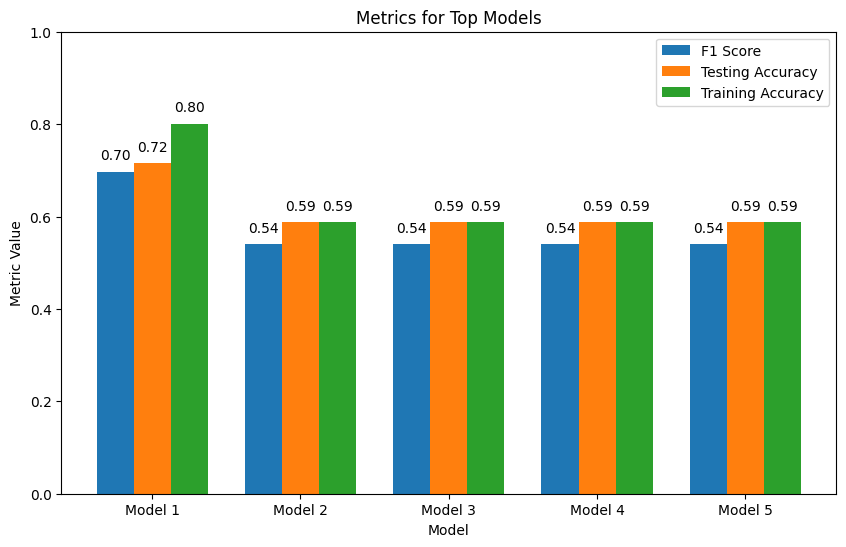

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Initialize subplots for ROC curve and AUC
fig_roc_auc, ax_roc_auc = plt.subplots(figsize=(10, 6))

# Initialize subplots for individual confusion matrices
fig_cm, axes_cm = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Initialize subplots for bar graph with F1 score, testing accuracy, and training accuracy
fig_metrics, ax_metrics = plt.subplots(figsize=(10, 6))

# Lists to store metrics
f1_scores, test_accuracies, train_accuracies = [], [], []

# Print hyperparameters for each model
for i, idx in enumerate(unique_top_model_indices):
    # Get the hyperparameters for the current model
    params = results['params'][idx]

    # Clone the model and set the parameters
    model = clone(dt_grid.best_estimator_).set_params(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)

    # ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for class_idx in range(len(model.classes_)):
        fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test == model.classes_[class_idx], y_test_proba[:, class_idx])
        roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

    # Plotting individual ROC Curves
    for class_idx in range(len(model.classes_)):
        ax_roc_auc.plot(fpr[class_idx], tpr[class_idx], label=f'Model {i + 1}, Class {class_idx} (AUC = {roc_auc[class_idx]:.2f})')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plotting Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes_cm[i//3, i%3])
    axes_cm[i//3, i%3].set_title(f"Confusion Matrix for Model {i + 1}")
    axes_cm[i//3, i%3].set_xlabel('Predicted Label')
    axes_cm[i//3, i%3].set_ylabel('True Label')

    # Calculate and store F1 score, testing accuracy, and training accuracy
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, model.predict(X_train))

    f1_scores.append(f1)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

    # Print metrics and hyperparameters
    print(f"Model {i + 1} Metrics:")
    print(f"   F1 Score: {f1:.4f}")
    print(f"   Testing Accuracy: {test_acc:.4f}")
    print(f"   Training Accuracy: {train_acc:.4f}")
    print(f"   Hyperparameters: {params}")
    print("=" * 50)

# Adjust layout for ROC Curve and AUC
ax_roc_auc.plot([0, 1], [0, 1], 'k--')
ax_roc_auc.set_xlim([0.0, 1.0])
ax_roc_auc.set_ylim([0.0, 1.05])
ax_roc_auc.set_xlabel('False Positive Rate')
ax_roc_auc.set_ylabel('True Positive Rate')
ax_roc_auc.set_title('Combined ROC Curves and AUC')
ax_roc_auc.legend(loc="lower right")

# Adjust layout for Confusion Matrices
fig_cm.tight_layout()

# Bar graph with F1 score, testing accuracy, and training accuracy
models = [f'Model {i + 1}' for i in range(len(unique_top_model_indices))]
bar_width = 0.25
index = np.arange(len(models))

ax_metrics.bar(index, f1_scores, width=bar_width, label='F1 Score')
ax_metrics.bar(index + bar_width, test_accuracies, width=bar_width, label='Testing Accuracy')
ax_metrics.bar(index + 2 * bar_width, train_accuracies, width=bar_width, label='Training Accuracy')

# Add exact numbers on the bars
for i, value in enumerate(f1_scores):
    ax_metrics.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(test_accuracies):
    ax_metrics.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(train_accuracies):
    ax_metrics.text(i + 2 * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

ax_metrics.set_xticks(index + bar_width)
ax_metrics.set_xticklabels(models)
ax_metrics.set_ylim([0, 1])
ax_metrics.set_xlabel('Model')
ax_metrics.set_ylabel('Metric Value')
ax_metrics.set_title('Metrics for Top Models')
ax_metrics.legend()

# Show all plots
plt.show()


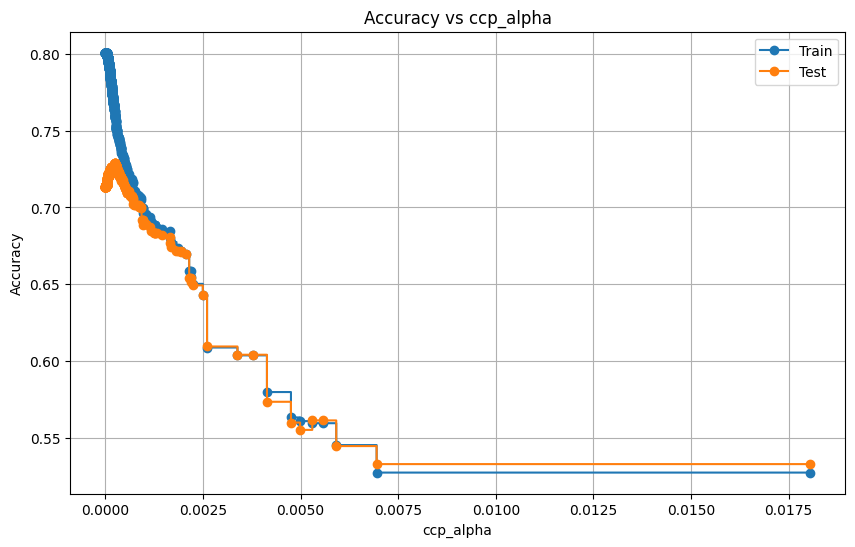

In [ ]:
# 3. Pruning using different ccp_alpha values
best_tree=dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Visualize the performance with different ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimal_ccp_alpha=0.0005
clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha, **dt_grid.best_params_)
clf_final.fit(X_train, y_train)
y_pred_final = clf_final.predict(X_test)

In [ ]:
print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))

Final Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79      2588
           1       0.15      0.01      0.01       635
           2       0.69      0.74      0.72      1802

    accuracy                           0.71      5025
   macro avg       0.53      0.54      0.51      5025
weighted avg       0.64      0.71      0.67      5025



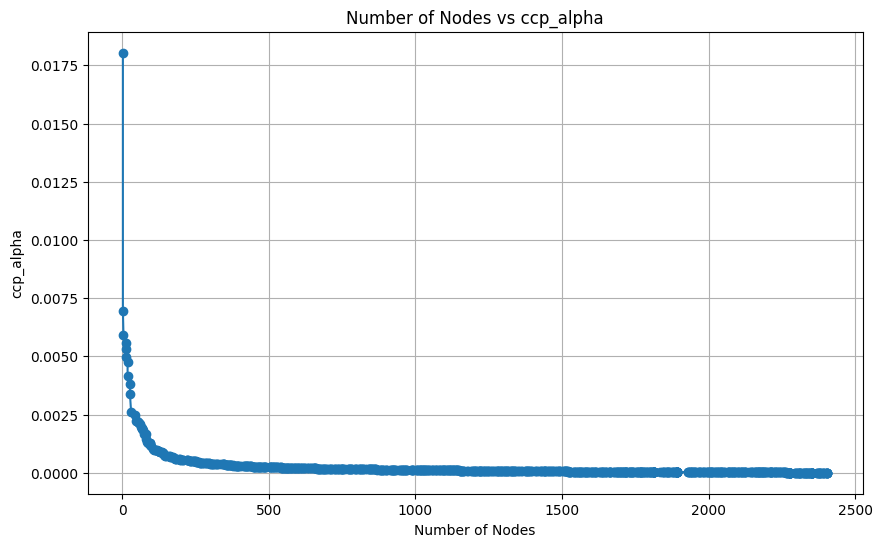

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

best_tree = dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
node_counts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)

# Visualize the relationship between number of nodes and ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(node_counts, ccp_alphas, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("ccp_alpha")
plt.title("Number of Nodes vs ccp_alpha")
plt.grid(True)
plt.show()

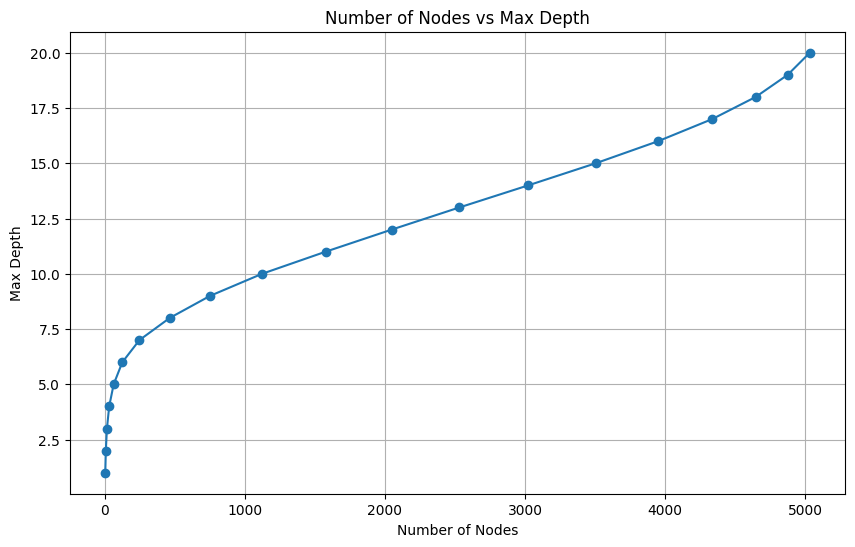

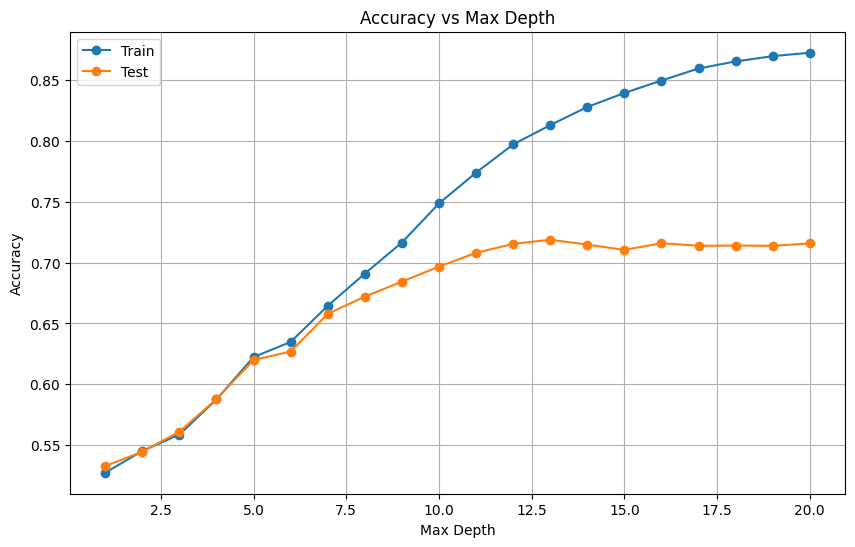

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize lists to store values
max_depth_values = range(1, 21)  # Adjust range as needed
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different max_depth values
for depth in max_depth_values:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot max_depth vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,max_depth_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("Max Depth")
plt.title("Number of Nodes vs Max Depth")
plt.grid(True)
plt.show()

# Plot accuracy vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()


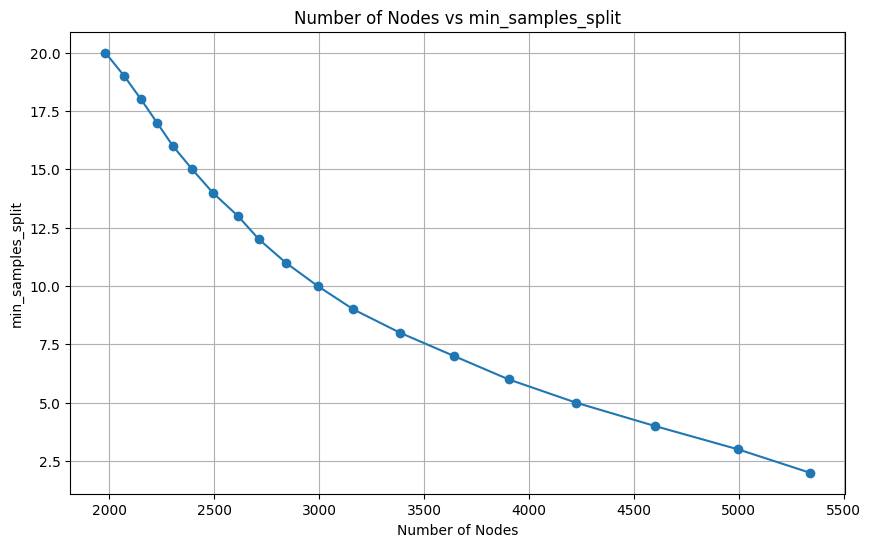

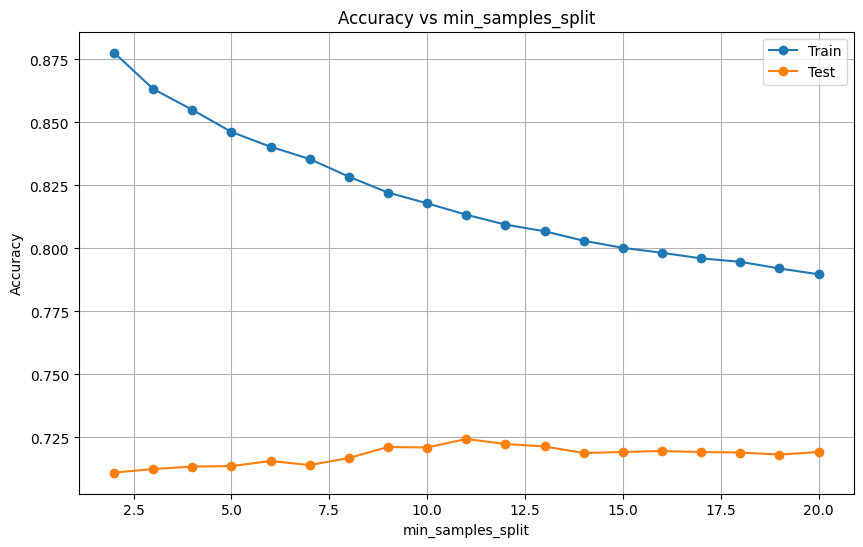

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_split values
min_samples_split_values = range(2, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_split values
for min_samples_split in min_samples_split_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_split vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,min_samples_split_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_split")
plt.title("Number of Nodes vs min_samples_split")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_split_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_split")
plt.legend()
plt.grid(True)
plt.show()


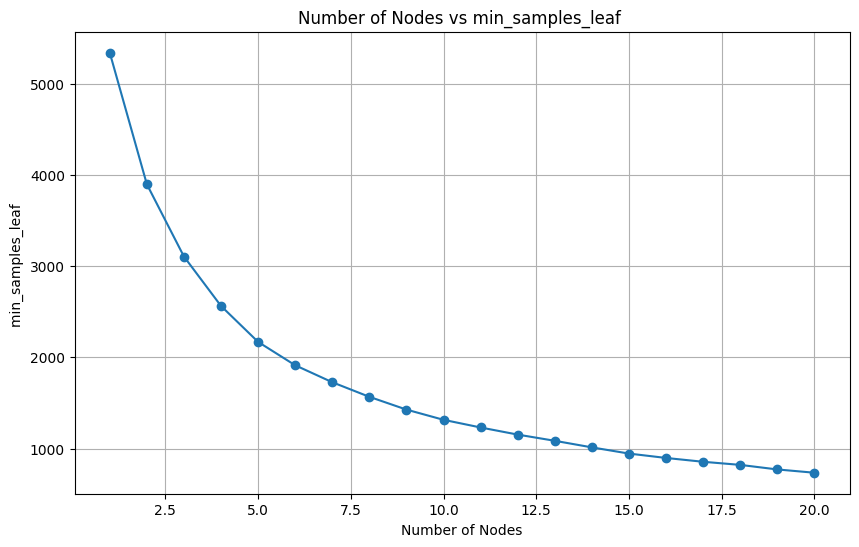

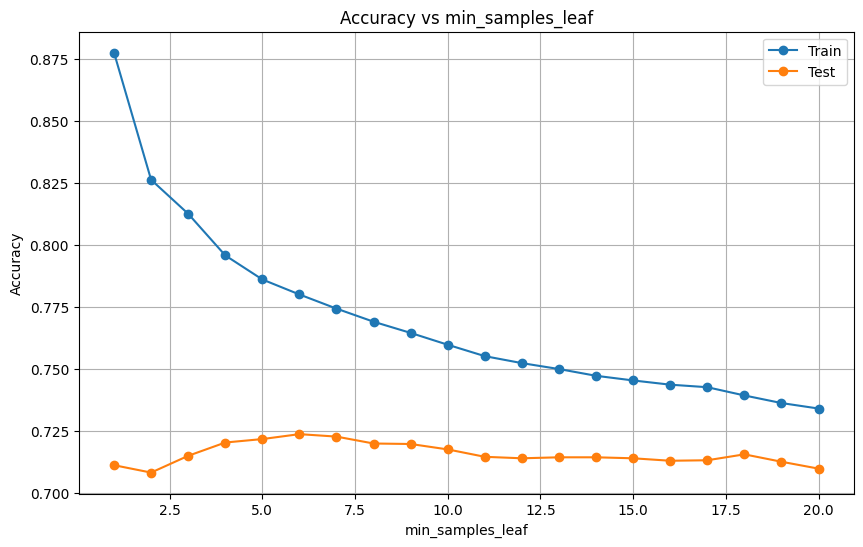

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_leaf values
min_samples_leaf_values = range(1, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_leaf vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, node_counts, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_leaf ")
plt.title("Number of Nodes vs min_samples_leaf ")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_leaf_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# knn_best_params_v = knn_grid.best_params_
# svm_linear_best_params_v = svm_linear_grid.best_params_
# svm_rbf_best_params_v = svm_rbf_grid.best_params_

In [ ]:
# print(f"KNN best params: {knn_best_params_v}")
# print(f"SVM Linear best params: {svm_linear_best_params_v}")
# print(f"SVM RBF best params: {svm_rbf_best_params_v}")

KNN best params: {'n_neighbors': 19, 'weights': 'distance'}


In [ ]:
# print("KNN Evaluation:", knn_evaluation_v)


KNN Evaluation: {'Accuracy': 0.7243781094527363, 'F1 Score': 0.5908519030852667, 'Precision': 0.6088161678783366, 'Recall': 0.5879790112242931, 'AUC ROC (Macro)': 0.7946642807714469, 'AUC ROC (Per Class)': {0: 0.8553196660956568, 1: 0.66601079762524, 2: 0.8624608848099623}, 'ROC Curve (Macro)': (array([0.        , 0.01275626, 0.01298405, ..., 0.65695527, 0.65736561,
       1.        ]), array([0.        , 0.09631676, 0.09815856, ..., 0.91083957, 0.91092973,
       1.        ])), 'Confusion Matrix': array([[2209,  120,  259],
       [ 324,  114,  197],
       [ 364,  121, 1317]])}


In [ ]:
# print("Naive Bayes Evaluation:", nb_evaluation_v)

In [ ]:
# print("SVM Linear Evaluation:", svm_linear_evaluation_v)

In [ ]:
# print("SVM RBF Evaluation:", svm_rbf_evaluation_v)

# SVC Trial

In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVM model with a non-linear kernel (e.g., RBF)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_predict = svm_model.predict(X_test)

In [ ]:
svm_model.score(X_test, y_test) #testing accuracy

0.43746776689014955

In [ ]:
svm_model.score(X_train, y_train) #training accuracy

0.4427742470295662

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

f1_score(y_test, y_predict, average='macro')

0.42547267135583683

In [ ]:
confusion_matrix(y_test, y_predict)

array([[1371,  399,  829],
       [ 958,  636,  964],
       [ 733,  480, 1386]])

In [ ]:
accuracy_score(y_test, y_predict) #similar to clf.score

0.43746776689014955

In [ ]:
precision_recall_fscore_support(y_test, y_predict)

(array([0.44774657, 0.41980198, 0.43598616]),
 array([0.52751058, 0.24863174, 0.53328203]),
 array([0.48436672, 0.31230052, 0.47975078]),
 array([2599, 2558, 2599]))

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.53      0.48      2599
           1       0.42      0.25      0.31      2558
           2       0.44      0.53      0.48      2599

    accuracy                           0.44      7756
   macro avg       0.43      0.44      0.43      7756
weighted avg       0.43      0.44      0.43      7756



In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Linear SVM w/o grid search

In [ ]:
# # SVM with linear kernel
# svm_linear_params = {'C': [0.1, 1, 10]}
# svm_linear_grid = GridSearchCV(SVC(kernel='linear'), svm_linear_params, cv=5)
# svm_linear_grid.fit(X_train, y_train)
from sklearn.svm import SVC

# Define the values of 'C' to try
C_values = [0.1, 1, 10]

# Dictionary to store trained models
svm_models = {}

# Train SVM models for each value of 'C'
for C in C_values:
    # Create SVM model with linear kernel and specified 'C'
    svm_model = SVC(kernel='linear', C=C)

    # Train the model
    svm_model.fit(X_train, y_train)

    # Store the trained model
    svm_models[C] = svm_model

print("done")

# Non linear kernel w/o grid search

In [ ]:
# SVM with non-linear kernel (RBF)
svm_rbf_params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf'), svm_rbf_params, cv=5)
svm_rbf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]})

# Model evaluation for ranges_csv

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# Evaluate models on test data
for C, svm_model in svm_models.items():
    # Predict using the trained model
    y_pred = svm_model.predict(X_test)

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"Results for SVM model with C={C}:")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", acc)
    print("Classification Report:")
    print(report)
    print("F1 Score:", f1)
    print("-----------------------------------")


In [ ]:
y_predict = svm_model.predict(X_test)
print("Test:",svm_model.score(X_test, y_test)) #testing accuracy
print("Training:",svm_model.score(X_train, y_train)) #training accuracy

f1_score(y_test, y_predict, average='weighted')

In [ ]:
confusion_matrix(y_test, y_predict)

In [ ]:
accuracy_score(y_test, y_predict) #similar to clf.score

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report

precision_recall_fscore_support(y_test, y_predict)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
svm_linear_evaluation = evaluate_multiclass_model(svm_linear_grid.best_estimator_, X_test, y_test)
svm_linear_best_params = svm_linear_grid.best_params_
print(f"SVM Linear best params: {svm_linear_best_params}")
print("SVM Linear Evaluation:", svm_linear_evaluation)

In [ ]:
svm_rbf_evaluation = evaluate_multiclass_model(svm_rbf_grid.best_estimator_, X_test, y_test)

In [ ]:
svm_rbf_best_params = svm_rbf_grid.best_params_

print(f"SVM RBF best parameters:{svm_rbf_best_params}")
print(f"SVM RBF Evaluation:{svm_rbf_evaluation}")


SVM RBF best parameters:{'C': 10, 'gamma': 1}
SVM RBF Evaluation:{'Accuracy': 0.5767148014440433, 'F1 Score': 0.5739575745477975, 'Precision': 0.5771442656315418, 'Recall': 0.5761387245931581, 'AUC ROC (Macro)': 0.7450660382498739, 'AUC ROC (Per Class)': {0: 0.7684528804391659, 1: 0.7004212166163626, 2: 0.7661097931268295}, 'ROC Curve (Macro)': (array([0.00000000e+00, 5.77145056e-04, 7.69526741e-04, ...,
       9.99615237e-01, 9.99806089e-01, 1.00000000e+00]), array([5.17129190e-04, 9.68613712e-04, 1.81409596e-03, ...,
       9.99967180e-01, 1.00000000e+00, 1.00000000e+00])), 'Confusion Matrix': array([[1681,  473,  445],
       [ 805, 1195,  558],
       [ 548,  454, 1597]])}


In [ ]:
# Evaluating each model
dt_evaluation_r = evaluate_multiclass_model(dt_grid.best_estimator_, X_test, y_test)

In [ ]:
dt_best_params = dt_grid.best_params_
print(f"DT best params: {dt_best_params}")
print(dt_evaluation_r)

DT best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'Accuracy': 0.7018340294171055, 'F1 Score': 0.7015620732725169, 'Precision': 0.7029124160542387, 'Recall': 0.7019004036216216, 'AUC ROC (Macro)': 0.8087483626989639, 'AUC ROC (Per Class)': {0: 0.8150947148499087, 1: 0.8083173946448978, 2: 0.802828536082766}, 'ROC Curve (Macro)': (array([0.        , 0.07424531, 0.07533315, 0.07560511, 0.07587707,
       0.07640206, 0.076421  , 0.07667299, 0.07696492, 0.07802763,
       0.07829856, 0.07859668, 0.07911135, 0.0791406 , 0.080466  ,
       0.08154972, 0.08200768, 0.0823625 , 0.08240413, 0.08310477,
       0.08317529, 0.08322002, 0.08365332, 0.08376394, 0.08430786,
       0.08447614, 0.0853957 , 0.08667032, 0.08757139, 0.08776742,
       0.08831596, 0.08886451, 0.08967759, 0.08968733, 0.09021945,
       0.09103224, 0.09105869, 0.09130317, 0.09160724, 0.09188151,
       0.09192276, 0.09219472, 0.09246668, 0.09355453, 0.09380143,
       0.09437041, 0.09482525, 0.0

In [ ]:
best_dt_model = dt_grid.best_estimator_
feature_importances = best_dt_model.feature_importances_
n_features = X_train.shape[1]
# Get the indices of the features sorted by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print the features and their respective importance values
print("Feature Importance:")
for i in range(n_features):
    feature_index = sorted_indices[i]
    importance = feature_importances[feature_index]
    feature_name = X_train.columns[feature_index]
    print(f"Feature {i + 1}: {feature_name} - Importance: {importance}")




Feature Importance:
Feature 1: INSECTICIDE_CONC - Importance: 0.18964269404940687
Feature 2: COUNTRY_NAME - Importance: 0.15658554949712356
Feature 3: MOSQUITO_NUMBER - Importance: 0.14045566132281848
Feature 4: SPECIES - Importance: 0.13397246726597078
Feature 5: SITE_NAME - Importance: 0.10250067707676809
Feature 6: ADMIN1 - Importance: 0.10074323524017388
Feature 7: ADMIN2 - Importance: 0.09039057321552589
Feature 8: INSECTICIDE_TYPE - Importance: 0.05275160878617202
Feature 9: INSECTICIDE_CLASS - Importance: 0.032881520342183404
Feature 10: TEST_TYPE - Importance: 7.601320385702541e-05


In [ ]:
knn_best_params = knn_grid.best_params_
print(f"KNN best params: {knn_best_params}")
knn_evaluation = evaluate_multiclass_model(knn_grid.best_estimator_, X_test, y_test)
print("KNN Evaluation:", knn_evaluation)

KNN best params: {'n_neighbors': 3}
KNN Evaluation: {'Accuracy': 0.6168831168831169, 'F1 Score': 0.48693476387408197, 'Precision': 0.5063778833584717, 'Recall': 0.48739968112342086, 'AUC ROC (Macro)': 0.6983710827503247, 'AUC ROC (Per Class)': {0: 0.7502493127149097, 1: 0.6070298082049459, 2: 0.7378341273311184}, 'ROC Curve (Macro)': (array([0.        , 0.00384615, 0.0486603 , 0.05542986, 0.08770525,
       0.19186942, 0.3040724 , 0.33880657, 0.48721897, 0.61273528,
       1.        ]), array([0.        , 0.01906937, 0.2006029 , 0.21874437, 0.30061214,
       0.46598817, 0.61073502, 0.64563392, 0.76405466, 0.83961587,
       1.        ])), 'Confusion Matrix': array([[2046,  115,  424],
       [ 383,   80,  199],
       [ 696,  130, 1009]])}


In [ ]:
nb_best_params = nb_scores
print(f"Naive Bayes best params: {nb_best_params}")
nb_evaluation = evaluate_multiclass_model(nb_model, X_test, y_test)
print("Naive Bayes Evaluation:", nb_evaluation)

Naive Bayes best params: [0.40661479 0.38404669 0.39353834 0.39081355 0.36745815]
Naive Bayes Evaluation: {'Accuracy': 0.3898674414381696, 'F1 Score': 0.3755078842444544, 'Precision': 0.4133717379988722, 'Recall': 0.39105784065698623, 'AUC ROC (Macro)': 0.5552190050130013, 'AUC ROC (Per Class)': {0: 0.5762639089964038, 1: 0.5346795394796483, 2: 0.5544877340496368}, 'ROC Curve (Macro)': (array([0.00000000e+00, 2.70929287e-04, 2.71960838e-04, 2.74273176e-04,
       5.43921675e-04, 5.48546352e-04, 1.64563906e-03, 2.19418541e-03,
       2.74273176e-03, 3.01700494e-03, 3.56555129e-03, 3.83982447e-03,
       8.43078597e-03, 1.19662769e-02, 2.08615551e-02, 2.19452723e-02,
       2.35708480e-02, 1.04772353e-01, 1.05046626e-01, 1.07789358e-01,
       3.18341913e-01, 3.19425630e-01, 3.28908155e-01, 3.29720943e-01,
       4.90889312e-01, 4.91161273e-01, 6.15194734e-01, 6.16840373e-01,
       6.17351101e-01, 6.18438945e-01, 8.35545923e-01, 8.35816852e-01,
       8.36358710e-01, 8.39338933e-01, 9.5

In [ ]:
svm_linear_best_params = svm_linear_grid.best_params_
print(f"SVM linear best params: {svm_linear_best_params}")
svm_linear_evaluation = evaluate_multiclass_model(svm_linear_grid.best_estimator_, X_test, y_test)
print("SVM linear Evaluation:", svm_linear_evaluation)

In [ ]:
# Initialize set for unique hyperparameters
unique_hyperparameters = set()

# Initialize list for unique top models based on mean test score
unique_top_model_indices = []

# Set a threshold for minimum difference in performance to consider
performance_threshold = 0.0001  # e.g., 1% difference


# Get the results of the grid search
results = dt_grid.cv_results_

# Get the sorted scores and indices
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'][sorted_indices]

# Loop over sorted scores and indices to find unique top models
# Loop over sorted scores and indices to find unique top models
for idx, score in zip(sorted_indices, sorted_scores):
    params = results['params'][idx]
    # Convert hyperparameters to a frozenset for uniqueness checking
    params_frozen = frozenset(params.items())
    # Check if this combination of hyperparameters is unique and differs from the next by the threshold
    if params_frozen not in unique_hyperparameters and \
       (len(unique_top_model_indices) == 0 or score <= sorted_scores[unique_top_model_indices[-1]] - performance_threshold):
        unique_hyperparameters.add(params_frozen)
        unique_top_model_indices.append(idx)
        # Break if we have found the desired number of unique models
        if len(unique_top_model_indices) >= 5:
            break


# Now unique_top_model_indices contains indices of unique models
# Continue with your plotting code using unique_top_model_indices


In [ ]:
# Print indices and hyperparameters
print("Indices of unique models:", unique_top_model_indices)
print("Hyperparameters of unique models:")
for idx in unique_top_model_indices:
    print(results['params'][idx])

Indices of unique models: [720, 35, 38, 32, 34]
Hyperparameters of unique models:
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 8}
{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [ ]:
clf_initial = DecisionTreeClassifier(random_state=42)
clf_initial.fit(X_train, y_train)
y_pred_initial = clf_initial.predict(X_test)
print("Initial Model Performance:")
print(classification_report(y_test, y_pred_initial))

Initial Model Performance:
              precision    recall  f1-score   support

           0       0.62      0.71      0.66      2565
           1       0.68      0.60      0.64      2634
           2       0.63      0.62      0.62      2555

    accuracy                           0.64      7754
   macro avg       0.64      0.64      0.64      7754
weighted avg       0.64      0.64      0.64      7754



In [ ]:
# Initialize set for unique hyperparameters
unique_hyperparameters = set()

# Initialize list for unique top models based on mean test score
unique_top_model_indices = []

# Set a threshold for minimum difference in performance to consider
performance_threshold = 0.0001  # e.g., 1% difference


# Get the results of the grid search
results = dt_grid.cv_results_

# Get the sorted scores and indices
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'][sorted_indices]

# Loop over sorted scores and indices to find unique top models
# Loop over sorted scores and indices to find unique top models
for idx, score in zip(sorted_indices, sorted_scores):
    params = results['params'][idx]
    # Convert hyperparameters to a frozenset for uniqueness checking
    params_frozen = frozenset(params.items())
    # Check if this combination of hyperparameters is unique and differs from the next by the threshold
    if params_frozen not in unique_hyperparameters and \
       (len(unique_top_model_indices) == 0 or score <= sorted_scores[unique_top_model_indices[-1]] - performance_threshold):
        unique_hyperparameters.add(params_frozen)
        unique_top_model_indices.append(idx)
        # Break if we have found the desired number of unique models
        if len(unique_top_model_indices) >= 5:
            break


# Now unique_top_model_indices contains indices of unique models
# Continue with your plotting code using unique_top_model_indices


In [ ]:
dt_best_params_r = dt_grid.best_params_
print(f"Decision Tree best params: {dt_best_params_r}")
print("Decision Tree Evaluation:", dt_evaluation_r)

Decision Tree best params: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Evaluation: {'Accuracy': 0.6361877740521021, 'F1 Score': 0.6355820022127384, 'Precision': 0.6381869225391323, 'Recall': 0.6364874928966923, 'AUC ROC (Macro)': 0.7495140832556751, 'AUC ROC (Per Class)': {0: 0.7620014147486228, 1: 0.7515579397423121, 2: 0.7349728929505862}, 'ROC Curve (Macro)': (array([0.        , 0.1015625 , 0.10195313, 0.10253906, 0.10273438,
       0.10429687, 0.10664063, 0.10820312, 0.10859375, 0.11289062,
       0.11328125, 0.11386719, 0.11445313, 0.11542969, 0.1234375 ,
       0.12363281, 0.12480469, 0.12734375, 0.12832031, 0.12871094,
       0.1296875 , 0.14233506, 0.14252741, 0.14329679, 0.14368148,
       0.14387382, 0.14406617, 0.14502789, 0.14665639, 0.14761997,
       0.14829775, 0.14896897, 0.14964416, 0.14993255, 0.15002885,
       0.15108884, 0.15397957, 0.15455772, 0.15475043, 0.15494315,
       0.15772264, 0.15887671, 0.15906905, 0.16022312, 0.161954

Model 1 Metrics:
   F1 Score: 0.6322
   Testing Accuracy: 0.6328
   Training Accuracy: 0.9079
   Hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 2 Metrics:
   F1 Score: 0.3800
   Testing Accuracy: 0.3826
   Training Accuracy: 0.3854
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 5}
Model 3 Metrics:
   F1 Score: 0.3800
   Testing Accuracy: 0.3826
   Training Accuracy: 0.3854
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 8}
Model 4 Metrics:
   F1 Score: 0.3800
   Testing Accuracy: 0.3826
   Training Accuracy: 0.3854
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Model 5 Metrics:
   F1 Score: 0.3800
   Testing Accuracy: 0.3826
   Training Accuracy: 0.3854
   Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 4}


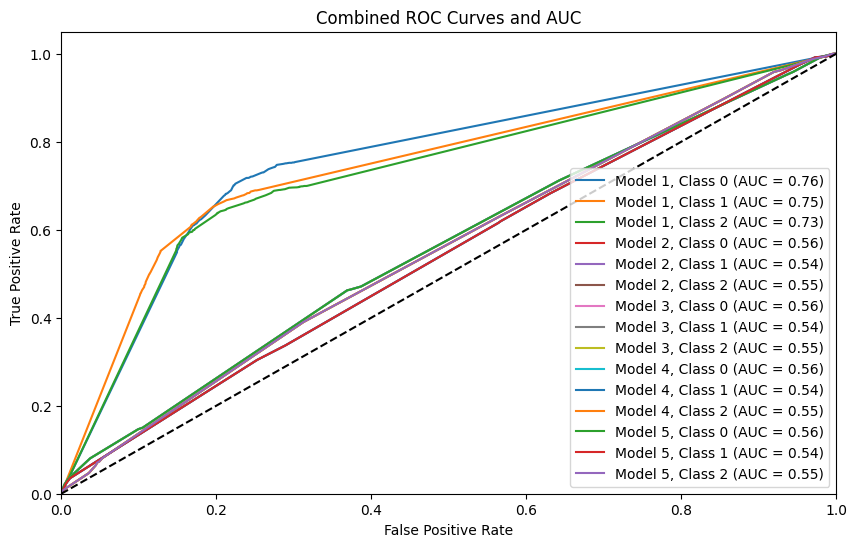

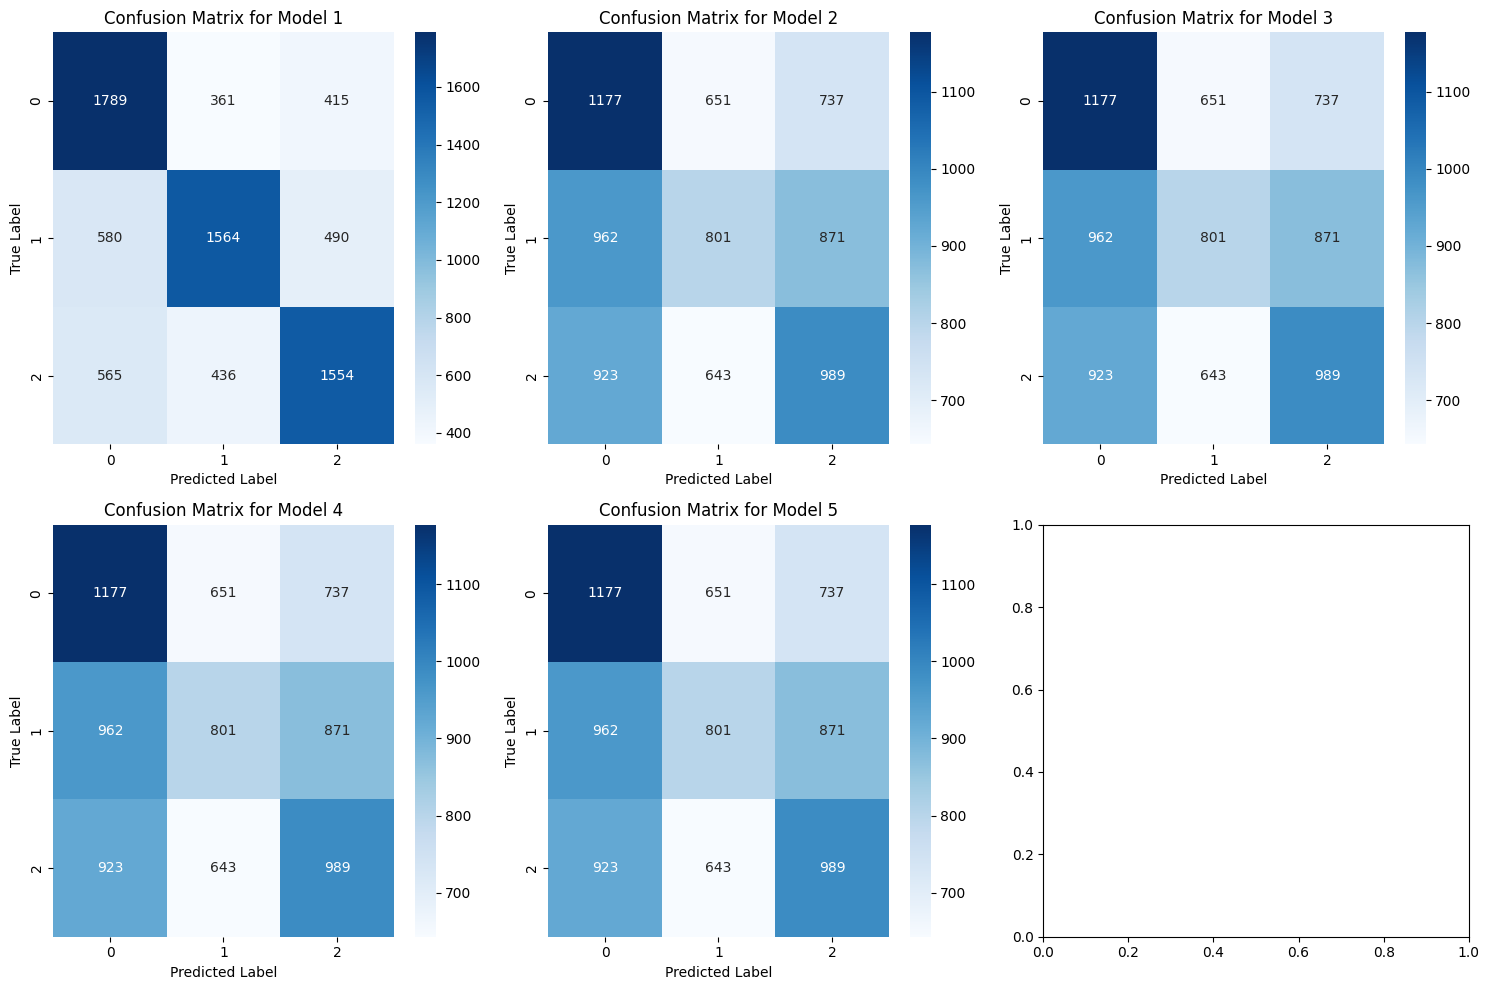

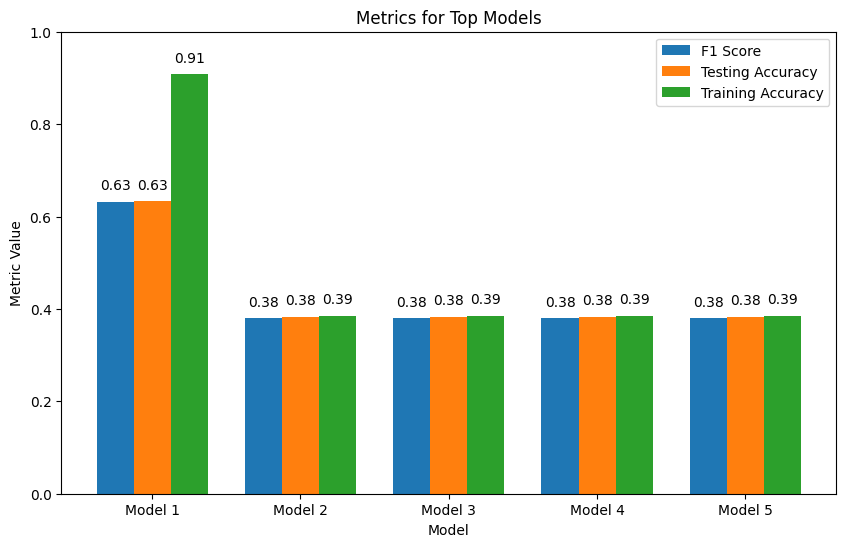

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Initialize subplots for ROC curve and AUC
fig_roc_auc, ax_roc_auc = plt.subplots(figsize=(10, 6))

# Initialize subplots for individual confusion matrices
fig_cm, axes_cm = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Initialize subplots for bar graph with F1 score, testing accuracy, and training accuracy
fig_metrics, ax_metrics = plt.subplots(figsize=(10, 6))

# Lists to store metrics
f1_scores, test_accuracies, train_accuracies = [], [], []

# Print hyperparameters for each model
for i, idx in enumerate(unique_top_model_indices):
    # Get the hyperparameters for the current model
    params = results['params'][idx]

    # Clone the model and set the parameters
    model = clone(dt_grid.best_estimator_).set_params(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)

    # ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for class_idx in range(len(model.classes_)):
        fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test == model.classes_[class_idx], y_test_proba[:, class_idx])
        roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

    # Plotting individual ROC Curves
    for class_idx in range(len(model.classes_)):
        ax_roc_auc.plot(fpr[class_idx], tpr[class_idx], label=f'Model {i + 1}, Class {class_idx} (AUC = {roc_auc[class_idx]:.2f})')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Plotting Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes_cm[i//3, i%3])
    axes_cm[i//3, i%3].set_title(f"Confusion Matrix for Model {i + 1}")
    axes_cm[i//3, i%3].set_xlabel('Predicted Label')
    axes_cm[i//3, i%3].set_ylabel('True Label')

    # Calculate and store F1 score, testing accuracy, and training accuracy
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, model.predict(X_train))

    f1_scores.append(f1)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

    # Print metrics and hyperparameters
    print(f"Model {i + 1} Metrics:")
    print(f"   F1 Score: {f1:.4f}")
    print(f"   Testing Accuracy: {test_acc:.4f}")
    print(f"   Training Accuracy: {train_acc:.4f}")
    print(f"   Hyperparameters: {params}")
    print("=" * 50)

# Adjust layout for ROC Curve and AUC
ax_roc_auc.plot([0, 1], [0, 1], 'k--')
ax_roc_auc.set_xlim([0.0, 1.0])
ax_roc_auc.set_ylim([0.0, 1.05])
ax_roc_auc.set_xlabel('False Positive Rate')
ax_roc_auc.set_ylabel('True Positive Rate')
ax_roc_auc.set_title('Combined ROC Curves and AUC')
ax_roc_auc.legend(loc="lower right")

# Adjust layout for Confusion Matrices
fig_cm.tight_layout()

# Bar graph with F1 score, testing accuracy, and training accuracy
models = [f'Model {i + 1}' for i in range(len(unique_top_model_indices))]
bar_width = 0.25
index = np.arange(len(models))

ax_metrics.bar(index, f1_scores, width=bar_width, label='F1 Score')
ax_metrics.bar(index + bar_width, test_accuracies, width=bar_width, label='Testing Accuracy')
ax_metrics.bar(index + 2 * bar_width, train_accuracies, width=bar_width, label='Training Accuracy')

# Add exact numbers on the bars
for i, value in enumerate(f1_scores):
    ax_metrics.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(test_accuracies):
    ax_metrics.text(i + bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(train_accuracies):
    ax_metrics.text(i + 2 * bar_width, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

ax_metrics.set_xticks(index + bar_width)
ax_metrics.set_xticklabels(models)
ax_metrics.set_ylim([0, 1])
ax_metrics.set_xlabel('Model')
ax_metrics.set_ylabel('Metric Value')
ax_metrics.set_title('Metrics for Top Models')
ax_metrics.legend()

# Show all plots
plt.show()


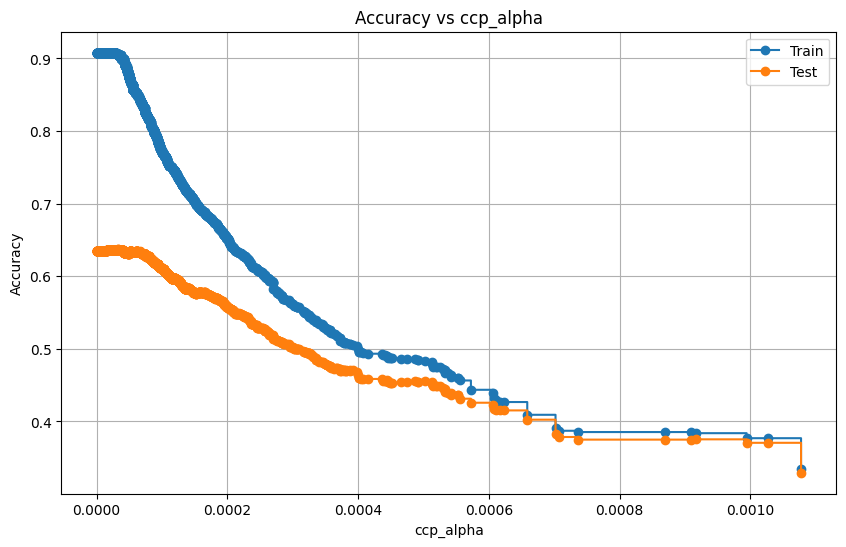

In [ ]:
# 3. Pruning using different ccp_alpha values
best_tree=dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Visualize the performance with different ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimal_ccp_alpha=0.0
clf_final = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha, **dt_grid.best_params_)
clf_final.fit(X_train, y_train)
y_pred_final = clf_final.predict(X_test)

In [ ]:
print("Final Model Performance:")
print(classification_report(y_test, y_pred_final))

Final Model Performance:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2565
           1       0.66      0.60      0.63      2634
           2       0.64      0.61      0.62      2555

    accuracy                           0.63      7754
   macro avg       0.64      0.63      0.63      7754
weighted avg       0.64      0.63      0.63      7754



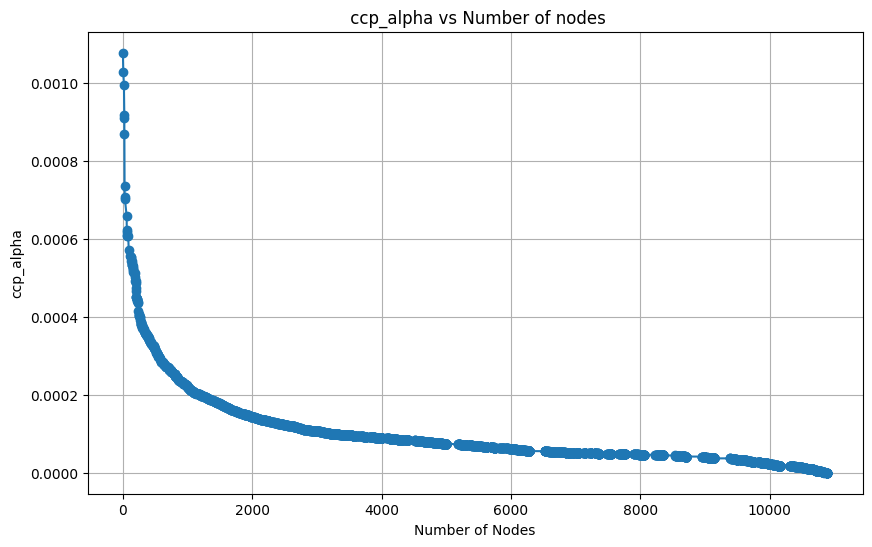

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

best_tree = dt_grid.best_estimator_
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
node_counts = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, **dt_grid.best_params_)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)

# Visualize the relationship between number of nodes and ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(node_counts, ccp_alphas, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("ccp_alpha")
plt.title(" ccp_alpha vs Number of nodes")
plt.grid(True)
plt.show()


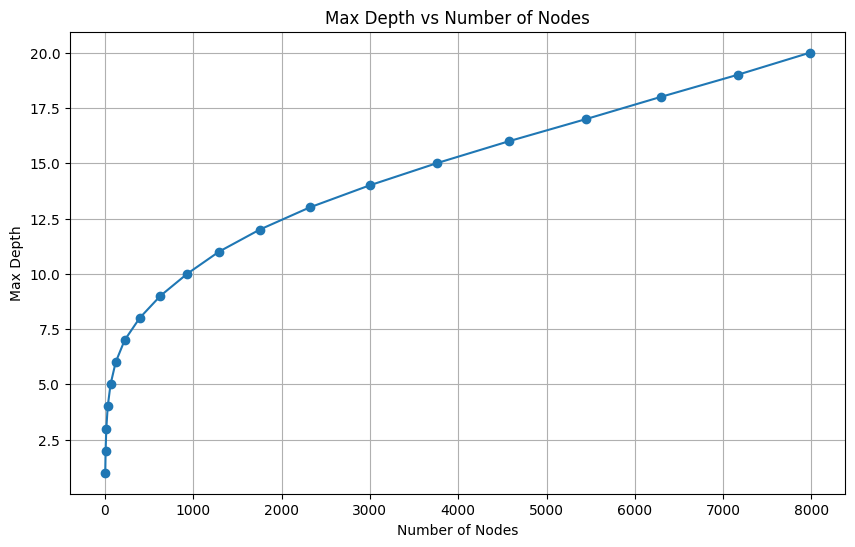

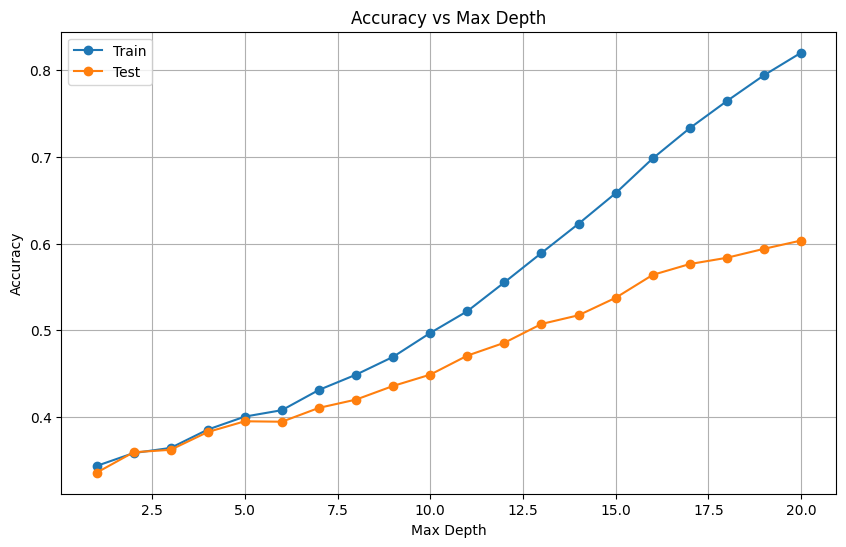

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize lists to store values
max_depth_values = range(1, 21)  # Adjust range as needed
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different max_depth values
for depth in max_depth_values:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot max_depth vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,max_depth_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("Max Depth")
plt.title("Max Depth vs Number of Nodes")
plt.grid(True)
plt.show()

# Plot accuracy vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(max_depth_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()


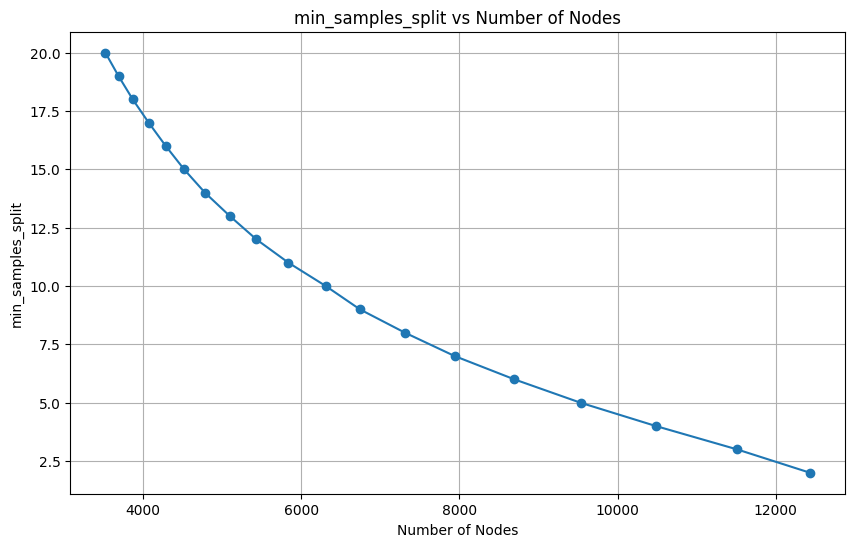

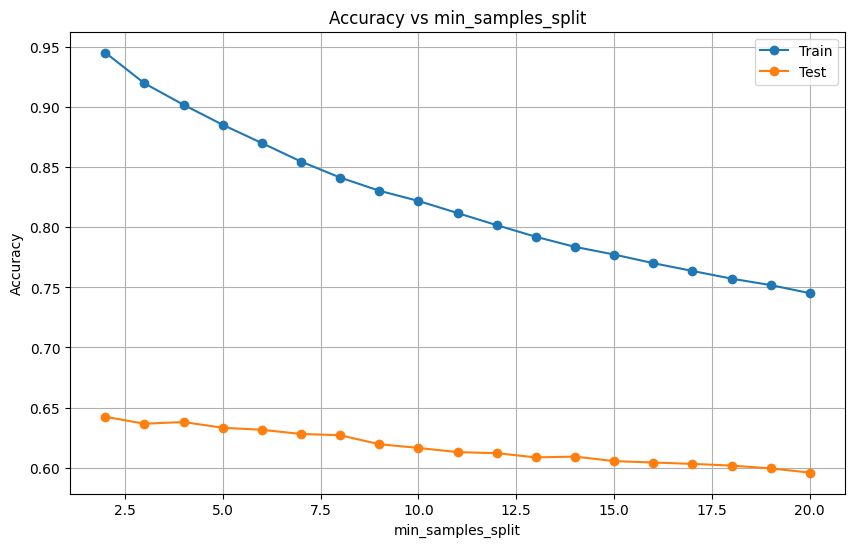

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_split values
min_samples_split_values = range(2, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_split values
for min_samples_split in min_samples_split_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_split vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(node_counts,min_samples_split_values, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_split")
plt.title("min_samples_split vs Number of Nodes")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_split_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_split")
plt.legend()
plt.grid(True)
plt.show()


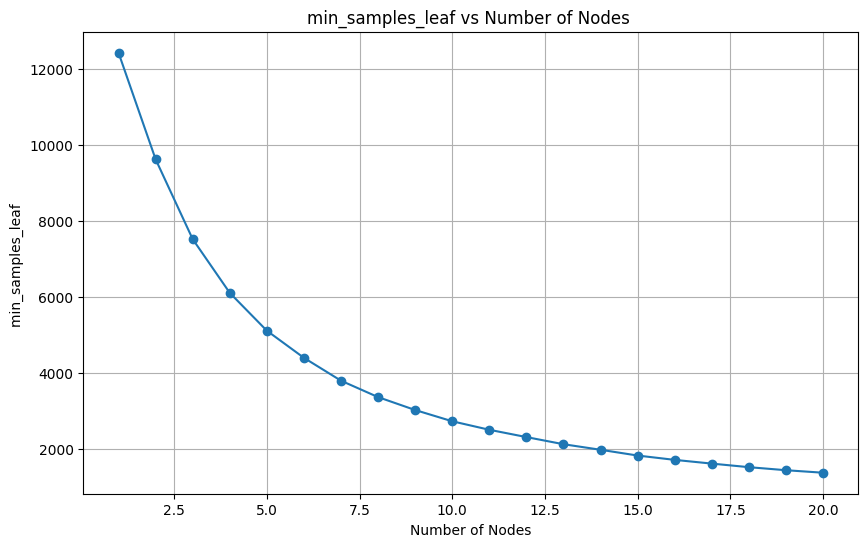

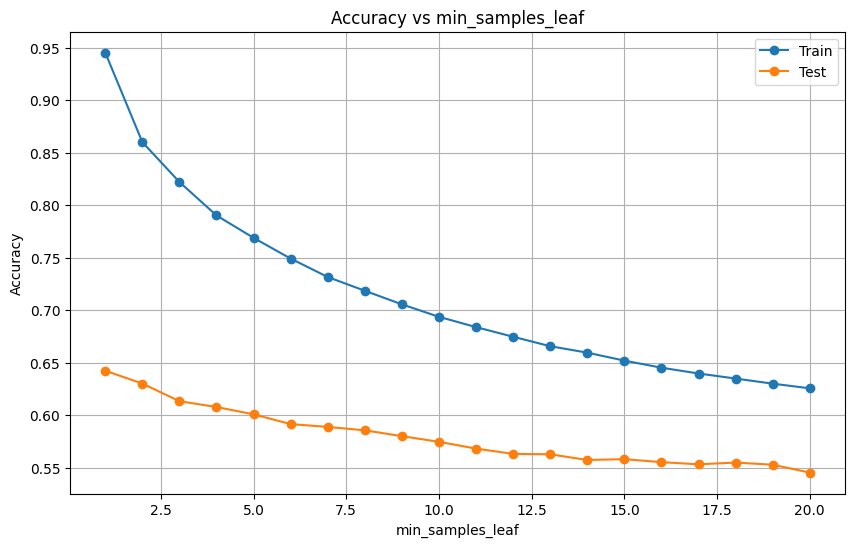

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define min_samples_leaf values
min_samples_leaf_values = range(1, 21)  # Adjust range as needed

# Initialize lists to store values
node_counts = []
train_accuracies = []
test_accuracies = []

# Calculate node counts and accuracies for different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot min_samples_leaf vs number of nodes
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, node_counts, marker='o', linestyle='-')
plt.xlabel("Number of Nodes")
plt.ylabel("min_samples_leaf ")
plt.title("min_samples_leaf vs Number of Nodes ")
plt.grid(True)
plt.show()

# Plot accuracy vs min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, marker='o', label='Train', linestyle='-')
plt.plot(min_samples_leaf_values, test_accuracies, marker='o', label='Test', linestyle='-')
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("Accuracy vs min_samples_leaf")
plt.legend()
plt.grid(True)
plt.show()


# DT with k vs accuracy (OVERSAMPLING UNDERSAMPLING)

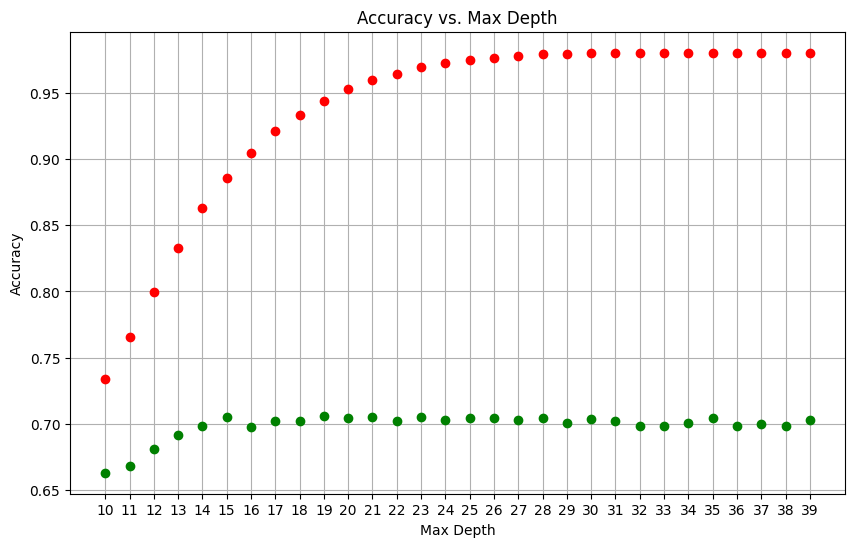

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = []
test_accuracies = []
train_accuracies = []
max_depth_values = range(10,40)


for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    # Predict on the test set
    y_pred = clf.predict(X_test)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    depths.append(max_depth)
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'ro')
plt.plot(depths, test_accuracies, 'go', )
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()

# KNN (STRATIFIED ONLY)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 250, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_feature_importance)
print(list(sorted_feature_importance.keys()))

{'SITE_NAME': 0.1720086862594632, 'MOSQUITO_NUMBER': 0.151423637918718, 'COUNTRY_NAME': 0.1446413429093936, 'SPECIES': 0.13417193723773188, 'ADMIN2': 0.13368842739796996, 'ADMIN1': 0.12851387805958095, 'INSECTICIDE_TYPE': 0.05514844912548262, 'INSECTICIDE_CONC': 0.041132561302329895, 'INSECTICIDE_CLASS': 0.03911968859621505, 'TEST_TYPE': 0.00015139119311489388}
['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'SPECIES', 'ADMIN2', 'ADMIN1', 'INSECTICIDE_TYPE', 'INSECTICIDE_CONC', 'INSECTICIDE_CLASS', 'TEST_TYPE']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{X_train.columns[i]}': Mutual Information Score = {score}")

Feature 'COUNTRY_NAME': Mutual Information Score = 0.20448580189693288
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.2022143874325002
Feature 'ADMIN1': Mutual Information Score = 0.2004298653320864
Feature 'TEST_TYPE': Mutual Information Score = 0.18012868942211768
Feature 'ADMIN2': Mutual Information Score = 0.1797933778133507
Feature 'SITE_NAME': Mutual Information Score = 0.132343425833104
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.12793132925820827
Feature 'INSECTICIDE_CONC': Mutual Information Score = 0.05870544911535536
Feature 'MOSQUITO_NUMBER': Mutual Information Score = 0.022561788165581742
Feature 'SPECIES': Mutual Information Score = 0.0


In [ ]:
# RF_importance = list(sorted_feature_importance.keys())
mi_scores_list = [X_train.columns[i] for i, _ in enumerate(sorted(mi_scores, reverse = True))]
# print(RF_importance)
print(mi_scores_list)

['COUNTRY_NAME', 'INSECTICIDE_CLASS', 'ADMIN1', 'TEST_TYPE', 'ADMIN2', 'SITE_NAME', 'INSECTICIDE_TYPE', 'INSECTICIDE_CONC', 'MOSQUITO_NUMBER', 'SPECIES']


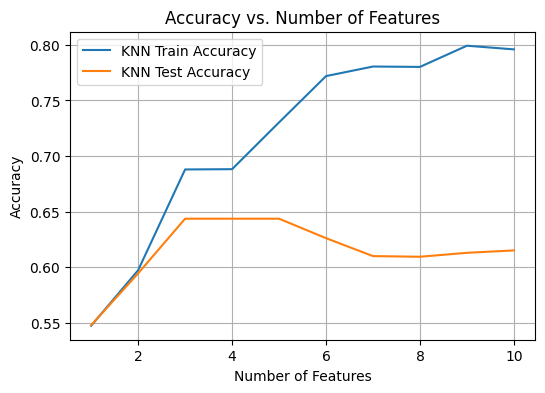

{'KNN': {'train': [0.5473559922408704, 0.5972843046301762, 0.6879480475668381, 0.6882010626634056, 0.7302859070591212, 0.7719490596272244, 0.780551572910517, 0.7802142194484271, 0.7992746900565068, 0.7959854938011302], 'test': [0.5478158205430933, 0.5944510035419126, 0.6436442345533254, 0.6436442345533254, 0.6436442345533254, 0.6261314443132625, 0.6099960645415191, 0.6094057457693821, 0.6129476584022039, 0.615112160566706]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "KNN": KNeighborsClassifier(2),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)
print(results)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train accuracy
train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Test accuracy
test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# F1 score
f1 = f1_score(y_test, test_pred, average='weighted')

# Classification report
report = classification_report(y_test, test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)
print("Classification Report:\n", report)


Train Accuracy: 0.7959854938011302
Test Accuracy: 0.615112160566706
F1 Score: 0.5931249981984761
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.74      2585
           1       0.23      0.19      0.21       662
           2       0.71      0.41      0.52      1835

    accuracy                           0.62      5082
   macro avg       0.53      0.49      0.49      5082
weighted avg       0.62      0.62      0.59      5082



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X_pca, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

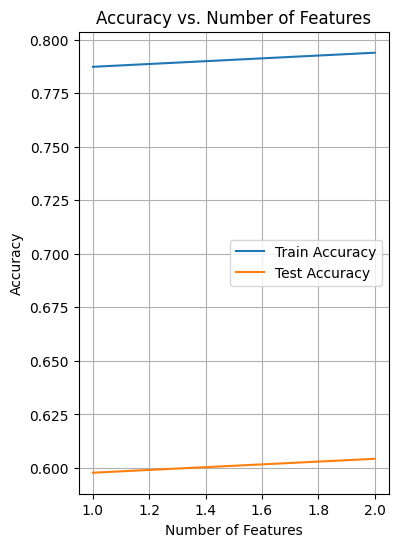

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
# PCA RUN
def compare_feature_selection(X_train, X_test, y_train, y_test, classifier):
    classifiers = {
        "KNN": KNeighborsClassifier(2),
    }

    max_features = range(1, X_train.shape[1] + 1)
    results = {classifier: {num_features: {"selected_features": None, "test": None, 'train': None, 'classification_report': None} for num_features in max_features} for classifier in classifiers}

    for num_features in max_features:
        for classifier_name, clf in classifiers.items():
            clf.fit(X_train[:, :num_features], y_train)
            train_acc = clf.score(X_train[:, :num_features], y_train)
            test_acc = clf.score(X_test[:, :num_features], y_test)
            results[classifier_name][num_features]["test"] = test_acc
            results[classifier_name][num_features]["train"] = train_acc
            # Get feature names
            selected_feature_names = X_train[:num_features]
            results[classifier_name][num_features]["selected_features"] = selected_feature_names
            # Generate classification report
            y_pred = clf.predict(X_test[:, :num_features])
            report = classification_report(y_test, y_pred)
            results[classifier_name][num_features]["classification_report"] = report

    plt.figure(figsize=(4, 6))
    for classifier_name, data in results.items():
        test_accuracies = [data[num_features]["test"] for num_features in max_features]
        train_accuracies = [data[num_features]["train"] for num_features in max_features]
        plt.plot(list(max_features), train_accuracies, label='Train Accuracy')
        plt.plot(list(max_features), test_accuracies, label='Test Accuracy')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_pca_knn = compare_feature_selection(X_train, X_test, y_train, y_test, "KNN")

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_multiclass_model(model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        # If the model has predict_proba method, it's a probabilistic classifier
        y_prob = model.predict_proba(X_test)
    else:
        # Otherwise, use decision function for probabilistic score
        y_prob = model.decision_function(X_test)

    y_pred = model.predict(X_test)
    n_classes = len(np.unique(y_test))

    # Compute one-hot encoding for y_test and y_pred
    y_test_one_hot = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_one_hot = label_binarize(y_pred, classes=np.unique(y_test))

    # Compute multiclass AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    tpr_macro = np.zeros_like(fpr_macro)
    for i in range(n_classes):
        tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
    tpr_macro /= n_classes
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    # Compute accuracy, F1-score, precision, recall, and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC ROC (Macro)': roc_auc_macro,
        'AUC ROC (Per Class)': roc_auc,
        'ROC Curve (Macro)': (fpr_macro, tpr_macro),
        'Confusion Matrix': conf_matrix
    }


In [ ]:
dt_params = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,12,13,14,15], 'min_samples_leaf': [1, 2, 3, 4, 5,6,7,8,9,10], 'min_samples_split': list(range(2,10))}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, verbose = 10, n_jobs = -1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=10)

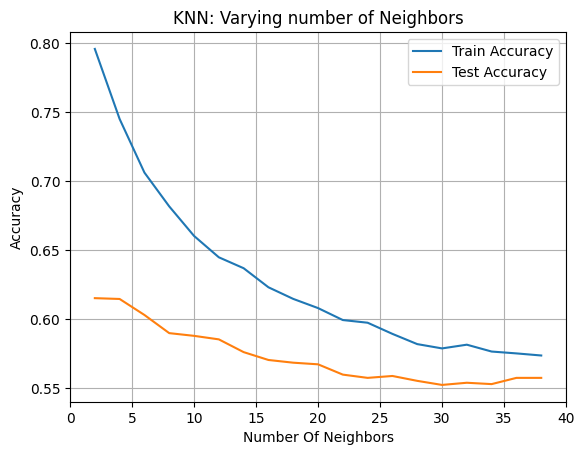

In [ ]:
# KNN
knn_params = {'n_neighbors': list(range(2,20))}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)


from sklearn.neighbors import KNeighborsClassifier
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 40, 2)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 40)
# plt.ylim(0.70, 0.90)
plt.grid()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import cross_val_score

# Instantiate Naive Bayes model
nb_model = BernoulliNB()

# Fit the model with training data
nb_model.fit(X_train, y_train)

# Calculate cross-validation scores
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", nb_scores)

Cross-validation scores: [0.40661479 0.38404669 0.39353834 0.39081355 0.36745815]


# SVM Non Linear with k vs accuracy (STRATIFIED ONLY)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

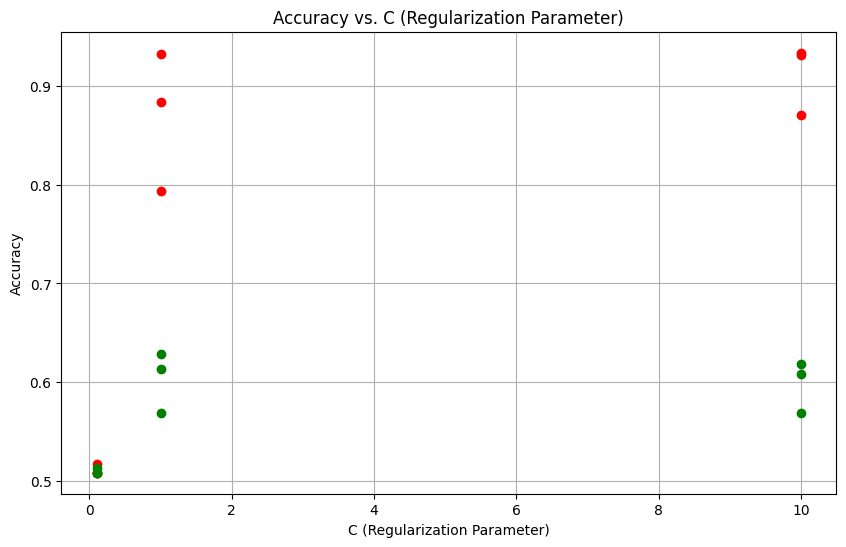

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define different values of C and gamma
C_values = [0.1, 1, 10]
gamma_values = [1, 0.1, 0.01]

# Lists to store results
Cs = []
gammas = []
test_accuracies = []
train_accuracies = []

for C in C_values:
    for gamma in gamma_values:
        # Create and fit the SVM model
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate accuracy on train and test sets
        train_acc = svm_model.score(X_train, y_train)
        test_acc = svm_model.score(X_test, y_test)

        # Append values to lists
        Cs.append(C)
        gammas.append(gamma)
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Cs, train_accuracies, 'ro', label='Train Accuracy')
plt.plot(Cs, test_accuracies, 'go', label='Test Accuracy')
plt.title('Accuracy vs. C (Regularization Parameter)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
# plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.grid(True)
# plt.legend()
plt.show()


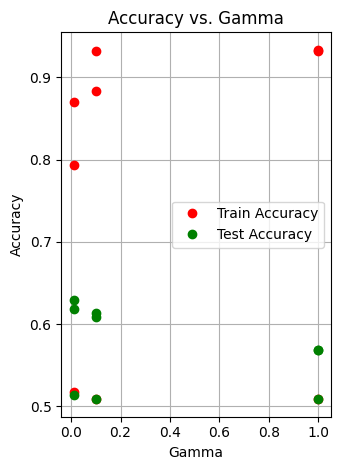

In [ ]:
# Plot accuracy vs. gamma
plt.subplot(1, 2, 2)
plt.plot(gammas, train_accuracies, 'ro', label='Train Accuracy')
plt.plot(gammas, test_accuracies, 'go', label='Test Accuracy')
plt.title('Accuracy vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

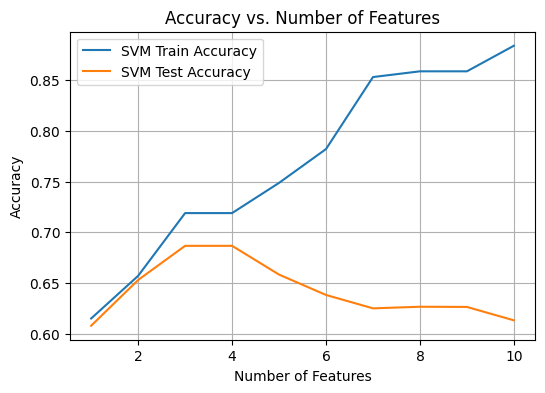

{'SVM': {'train': [0.6151640381209412, 0.6571645441511343, 0.7189845660791094, 0.7189845660791094, 0.7487560091085435, 0.7820696634899216, 0.852998228894324, 0.85864889938433, 0.85864889938433, 0.8838660706755503], 'test': [0.6080283353010626, 0.6530893349075167, 0.6867375049193231, 0.6867375049193231, 0.6584022038567493, 0.6383313656040929, 0.6251475796930342, 0.6267217630853994, 0.6265249901613538, 0.6133412042502951]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "SVM": SVC(kernel='rbf', C=1, gamma=0.1),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results_svm_mi = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)
print(results_svm_mi)

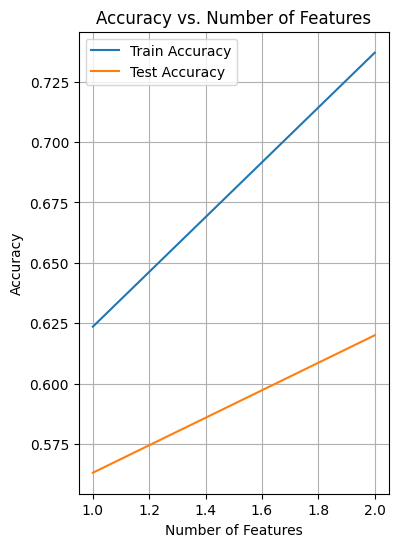

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
#PCA RUN


def compare_feature_selection(X_train, X_test, y_train, y_test, classifier):
    classifiers = {
        "SVM": SVC(kernel='rbf', C=1, gamma=0.1),
    }

    max_features = range(1, X_train.shape[1] + 1)
    results = {classifier: {num_features: {"selected_features": None, "test": None, 'train': None, 'classification_report': None} for num_features in max_features} for classifier in classifiers}

    for num_features in max_features:
        for classifier_name, clf in classifiers.items():
            clf.fit(X_train[:, :num_features], y_train)
            train_acc = clf.score(X_train[:, :num_features], y_train)
            test_acc = clf.score(X_test[:, :num_features], y_test)
            results[classifier_name][num_features]["test"] = test_acc
            results[classifier_name][num_features]["train"] = train_acc
            # Get feature names
            selected_feature_names = X_train[:num_features]
            results[classifier_name][num_features]["selected_features"] = selected_feature_names
            # Generate classification report
            y_pred = clf.predict(X_test[:, :num_features])
            report = classification_report(y_test, y_pred)
            results[classifier_name][num_features]["classification_report"] = report

    plt.figure(figsize=(4, 6))
    for classifier_name, data in results.items():
        test_accuracies = [data[num_features]["test"] for num_features in max_features]
        train_accuracies = [data[num_features]["train"] for num_features in max_features]
        plt.plot(list(max_features), train_accuracies, label='Train Accuracy')
        plt.plot(list(max_features), test_accuracies, label='Test Accuracy')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_pca = compare_feature_selection(X_train, X_test, y_train, y_test, "SVM")

In [ ]:
print(results_pca['SVM'][2]["classification_report"])

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      2585
           1       0.22      0.08      0.11       662
           2       0.63      0.53      0.58      1835

    accuracy                           0.62      5082
   macro avg       0.50      0.48      0.47      5082
weighted avg       0.58      0.62      0.59      5082



# KNN (OVERSAMPLING UNDERSAMPLING AND STRATIFIED)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

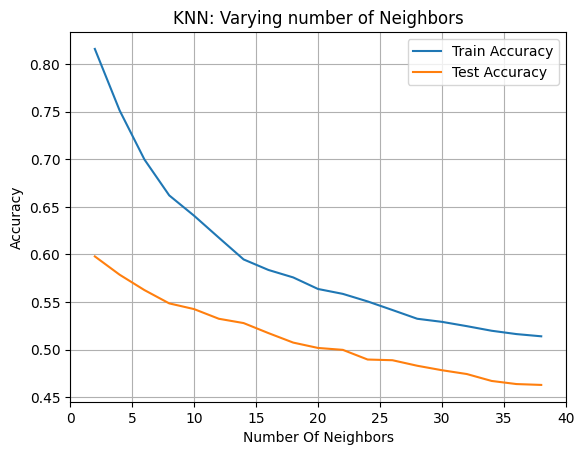

In [ ]:
# KNN
knn_params = {'n_neighbors': list(range(2,20))}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)


from sklearn.neighbors import KNeighborsClassifier
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 40, 2)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 40)
# plt.ylim(0.70, 0.90)
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 250, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_feature_importance)
print(list(sorted_feature_importance.keys()))

{'SITE_NAME': 0.15639655155924134, 'MOSQUITO_NUMBER': 0.14220290459750717, 'COUNTRY_NAME': 0.12792068275996402, 'ADMIN2': 0.12468916563206743, 'ADMIN1': 0.12083702689502328, 'SPECIES': 0.12021978037232443, 'INSECTICIDE_CONC': 0.1056820293428531, 'INSECTICIDE_TYPE': 0.06706801085073626, 'INSECTICIDE_CLASS': 0.03493193893083283, 'TEST_TYPE': 5.190905945005039e-05}
['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'ADMIN2', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{X_train.columns[i]}': Mutual Information Score = {score}")

Feature 'COUNTRY_NAME': Mutual Information Score = 0.2069121567523151
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.2038151581287968
Feature 'ADMIN1': Mutual Information Score = 0.20330207905022268
Feature 'TEST_TYPE': Mutual Information Score = 0.19128151716839192
Feature 'ADMIN2': Mutual Information Score = 0.17879110768181783
Feature 'SITE_NAME': Mutual Information Score = 0.1252333234000047
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.11888480993629957
Feature 'INSECTICIDE_CONC': Mutual Information Score = 0.06221164928069434
Feature 'MOSQUITO_NUMBER': Mutual Information Score = 0.013474240399428794
Feature 'SPECIES': Mutual Information Score = 0.0


In [ ]:
RF_importance = list(sorted_feature_importance.keys())
mi_scores_list = [X_train.columns[i] for i, _ in enumerate(sorted(mi_scores, reverse = True))]
print(RF_importance)
print(mi_scores_list)

['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'ADMIN2', 'ADMIN1', 'SPECIES', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']
['COUNTRY_NAME', 'INSECTICIDE_CLASS', 'ADMIN1', 'TEST_TYPE', 'ADMIN2', 'SITE_NAME', 'INSECTICIDE_TYPE', 'INSECTICIDE_CONC', 'MOSQUITO_NUMBER', 'SPECIES']


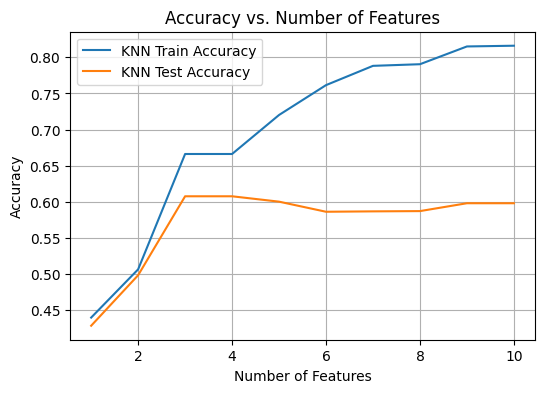

{'KNN': {'train': [0.43963571261773177, 0.5064217327002413, 0.6661477387716976, 0.6661477387716976, 0.72016813263797, 0.7615007394722503, 0.788199579668405, 0.7904569160115202, 0.8150540982330505, 0.8160660076282401], 'test': [0.4283639004902851, 0.49827492282549485, 0.6075903395678228, 0.6075903395678228, 0.6001452696568005, 0.5861630651897585, 0.5867078264027601, 0.5870710005447612, 0.5979662248047939, 0.5979662248047939]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "KNN": KNeighborsClassifier(2),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)
print(results)

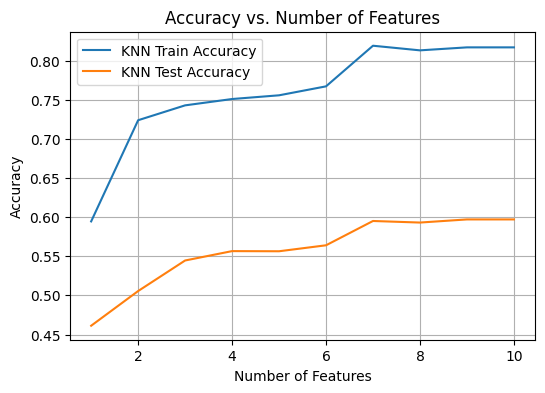

{'KNN': {'train': [0.5945356892659764, 0.7238265742975014, 0.7428193352533665, 0.7509146104148828, 0.7556628006538492, 0.7671051607379155, 0.8190238966295633, 0.8131081186269168, 0.8169222386549388, 0.8169222386549388], 'test': [0.4612311603413837, 0.5055384056655167, 0.5445796259306337, 0.5565643726166697, 0.5563827855456691, 0.564009442527692, 0.5950608316687852, 0.5930633738877792, 0.5970582894497912, 0.5970582894497912]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "KNN": KNeighborsClassifier(2),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results = compare_feature_selection(X_train, X_test, y_train, y_test, RF_importance)
print(results)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X_pca, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

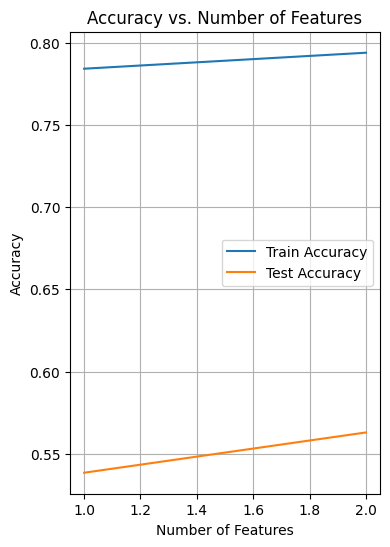

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
# PCA RUN
def compare_feature_selection(X_train, X_test, y_train, y_test, classifier):
    classifiers = {
        "KNN": KNeighborsClassifier(2),
    }

    max_features = range(1, X_train.shape[1] + 1)
    results = {classifier: {num_features: {"selected_features": None, "test": None, 'train': None, 'classification_report': None} for num_features in max_features} for classifier in classifiers}

    for num_features in max_features:
        for classifier_name, clf in classifiers.items():
            clf.fit(X_train[:, :num_features], y_train)
            train_acc = clf.score(X_train[:, :num_features], y_train)
            test_acc = clf.score(X_test[:, :num_features], y_test)
            results[classifier_name][num_features]["test"] = test_acc
            results[classifier_name][num_features]["train"] = train_acc
            # Get feature names
            selected_feature_names = X_train[:num_features]
            results[classifier_name][num_features]["selected_features"] = selected_feature_names
            # Generate classification report
            y_pred = clf.predict(X_test[:, :num_features])
            report = classification_report(y_test, y_pred)
            results[classifier_name][num_features]["classification_report"] = report

    plt.figure(figsize=(4, 6))
    for classifier_name, data in results.items():
        test_accuracies = [data[num_features]["test"] for num_features in max_features]
        train_accuracies = [data[num_features]["train"] for num_features in max_features]
        plt.plot(list(max_features), train_accuracies, label='Train Accuracy')
        plt.plot(list(max_features), test_accuracies, label='Test Accuracy')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_pca_knn = compare_feature_selection(X_train, X_test, y_train, y_test, "KNN")

In [ ]:
print(results_pca_knn['KNN'][2]["classification_report"])

              precision    recall  f1-score   support

           0       0.50      0.75      0.60      1835
           1       0.58      0.54      0.56      1836
           2       0.69      0.40      0.51      1836

    accuracy                           0.56      5507
   macro avg       0.59      0.56      0.56      5507
weighted avg       0.59      0.56      0.56      5507



# SVM Non Linear (OVERSAMPLING UNDERSAMPLING AND STRATIFIED)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ranges_mosq_X, ranges_mosq_Y, test_size=0.30, random_state=42,stratify=ranges_mosq_Y)

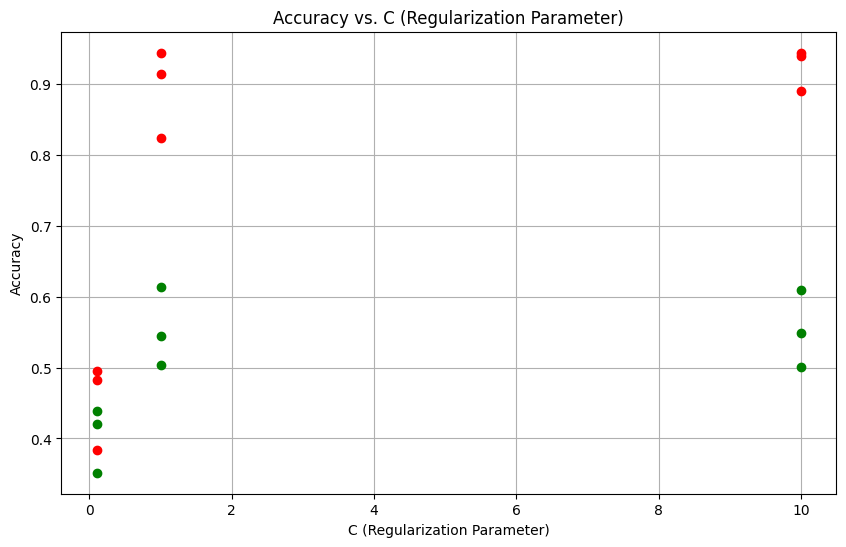

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define different values of C and gamma
C_values = [0.1, 1, 10]
gamma_values = [1, 0.1, 0.01]

# Lists to store results
Cs = []
gammas = []
test_accuracies = []
train_accuracies = []

for C in C_values:
    for gamma in gamma_values:
        # Create and fit the SVM model
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate accuracy on train and test sets
        train_acc = svm_model.score(X_train, y_train)
        test_acc = svm_model.score(X_test, y_test)

        # Append values to lists
        Cs.append(C)
        gammas.append(gamma)
        test_accuracies.append(test_acc)
        train_accuracies.append(train_acc)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Cs, train_accuracies, 'ro', label='Train Accuracy')
plt.plot(Cs, test_accuracies, 'go', label='Test Accuracy')
plt.title('Accuracy vs. C (Regularization Parameter)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
# plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.grid(True)
# plt.legend()
plt.show()


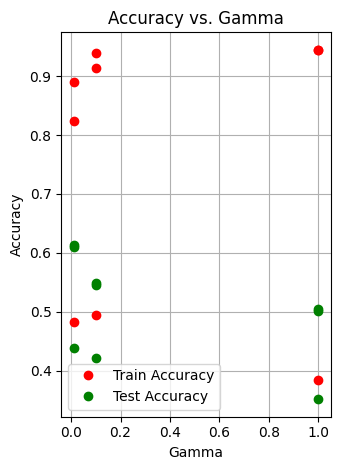

In [ ]:
# Plot accuracy vs. gamma
plt.subplot(1, 2, 2)
plt.plot(gammas, train_accuracies, 'ro', label='Train Accuracy')
plt.plot(gammas, test_accuracies, 'go', label='Test Accuracy')
plt.title('Accuracy vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

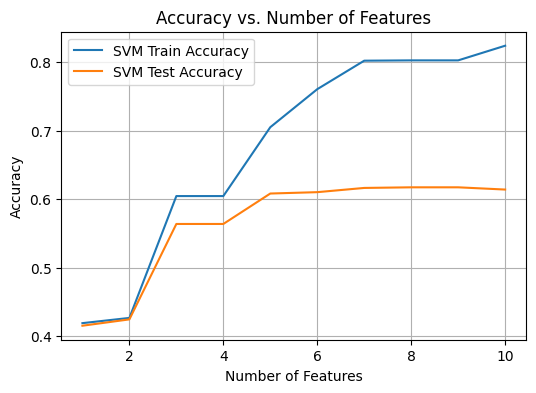

{'SVM': {'train': [0.41869697205573286, 0.42632521211177704, 0.6044212656651359, 0.6044212656651359, 0.7050673308943722, 0.7606445084455515, 0.8022884720168133, 0.8027555071222854, 0.8027555071222854, 0.8241612827897563], 'test': [0.4149264572362448, 0.42418739785727255, 0.563646268385691, 0.563646268385691, 0.6081351007808244, 0.6101325585618304, 0.6163065189758489, 0.6172144543308516, 0.6172144543308516, 0.6139458870528418]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "SVM": SVC(kernel='rbf', C=1, gamma=0.01),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results_svm_mi = compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list)
print(results_svm_mi)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 250, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}

sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

print(sorted_feature_importance)
print(list(sorted_feature_importance.keys()))
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

for i, score in enumerate(sorted(mi_scores, reverse = True)):
    print(f"Feature '{X_train.columns[i]}': Mutual Information Score = {score}")
RF_importance = list(sorted_feature_importance.keys())
mi_scores_list = [X_train.columns[i] for i, _ in enumerate(sorted(mi_scores, reverse = True))]
print(RF_importance)
print(mi_scores_list)

{'SITE_NAME': 0.15692232187801727, 'MOSQUITO_NUMBER': 0.14366846502651168, 'COUNTRY_NAME': 0.12899692059028148, 'ADMIN2': 0.12482781448761626, 'SPECIES': 0.1204202800889338, 'ADMIN1': 0.11959790023181625, 'INSECTICIDE_CONC': 0.10384458315473814, 'INSECTICIDE_TYPE': 0.06734789612179666, 'INSECTICIDE_CLASS': 0.034333906194615835, 'TEST_TYPE': 3.991222567269077e-05}
['SITE_NAME', 'MOSQUITO_NUMBER', 'COUNTRY_NAME', 'ADMIN2', 'SPECIES', 'ADMIN1', 'INSECTICIDE_CONC', 'INSECTICIDE_TYPE', 'INSECTICIDE_CLASS', 'TEST_TYPE']
Feature 'COUNTRY_NAME': Mutual Information Score = 0.19758107996497687
Feature 'INSECTICIDE_CLASS': Mutual Information Score = 0.1966808952231054
Feature 'ADMIN1': Mutual Information Score = 0.1954641098369343
Feature 'TEST_TYPE': Mutual Information Score = 0.1943781443886956
Feature 'ADMIN2': Mutual Information Score = 0.17630565440008428
Feature 'SITE_NAME': Mutual Information Score = 0.12624284524811347
Feature 'INSECTICIDE_TYPE': Mutual Information Score = 0.1260096031082

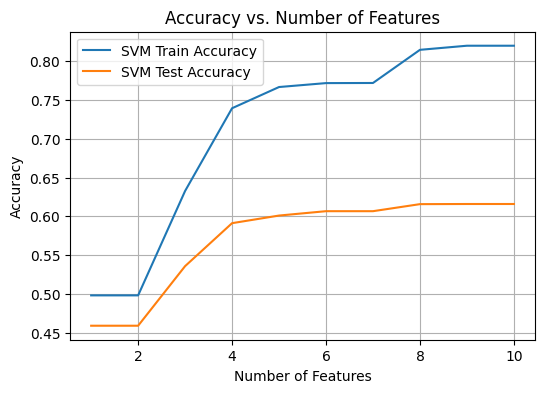

{'SVM': {'train': [0.4981707791702343, 0.4981707791702343, 0.6327547287304429, 0.7393944111465712, 0.7667159648166887, 0.7717755117926364, 0.7719311901611271, 0.8146649023118238, 0.8199579668405075, 0.8199579668405075], 'test': [0.45905211548937713, 0.45905211548937713, 0.5358634465226076, 0.5912475031777737, 0.6010532050118031, 0.60668240421282, 0.60668240421282, 0.6157617577628473, 0.6159433448338478, 0.6159433448338478]}}


In [ ]:
#FEATURE SELECTION RUN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

def compare_feature_selection(X_train, X_test, y_train, y_test, mi_scores_list):
    classifiers = {
        "SVM": SVC(kernel='rbf', C=1, gamma=0.01),
    }

    max_features = range(1, len(mi_scores_list) + 1)
    results = {classifier_name: {'train': [], 'test': []} for classifier_name in classifiers}

    for num_features in max_features:
        for classifier_name, classifier in classifiers.items():
            selected_features = mi_scores_list[:num_features]
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            classifier.fit(X_train_selected, y_train)
            train_acc = classifier.score(X_train_selected, y_train)
            test_acc = classifier.score(X_test_selected, y_test)
            results[classifier_name]['train'].append(train_acc)
            results[classifier_name]['test'].append(test_acc)

    plt.figure(figsize=(6, 4))
    for classifier_name, accuracies in results.items():
        plt.plot(max_features, accuracies['train'], label=f'{classifier_name} Train Accuracy')
        plt.plot(max_features, accuracies['test'], label=f'{classifier_name} Test Accuracy')


    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    return results

results_svm_rf = compare_feature_selection(X_train, X_test, y_train, y_test, RF_importance)
print(results_svm_rf)

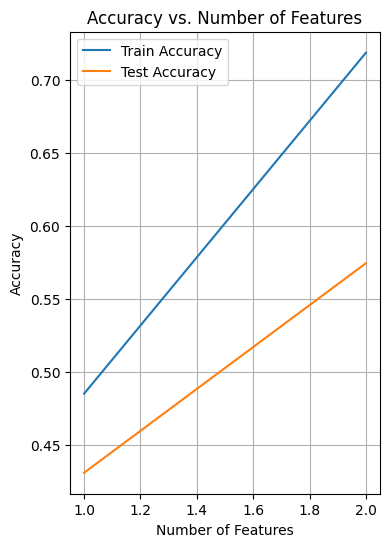

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
#PCA RUN


def compare_feature_selection(X_train, X_test, y_train, y_test, classifier):
    classifiers = {
        "SVM": SVC(kernel='rbf', C=1, gamma=0.01),
    }

    max_features = range(1, X_train.shape[1] + 1)
    results = {classifier: {num_features: {"selected_features": None, "test": None, 'train': None, 'classification_report': None} for num_features in max_features} for classifier in classifiers}

    for num_features in max_features:
        for classifier_name, clf in classifiers.items():
            clf.fit(X_train[:, :num_features], y_train)
            train_acc = clf.score(X_train[:, :num_features], y_train)
            test_acc = clf.score(X_test[:, :num_features], y_test)
            results[classifier_name][num_features]["test"] = test_acc
            results[classifier_name][num_features]["train"] = train_acc
            # Get feature names
            selected_feature_names = X_train[:num_features]
            results[classifier_name][num_features]["selected_features"] = selected_feature_names
            # Generate classification report
            y_pred = clf.predict(X_test[:, :num_features])
            report = classification_report(y_test, y_pred)
            results[classifier_name][num_features]["classification_report"] = report

    plt.figure(figsize=(4, 6))
    for classifier_name, data in results.items():
        test_accuracies = [data[num_features]["test"] for num_features in max_features]
        train_accuracies = [data[num_features]["train"] for num_features in max_features]
        plt.plot(list(max_features), train_accuracies, label='Train Accuracy')
        plt.plot(list(max_features), test_accuracies, label='Test Accuracy')

    plt.title('Accuracy vs. Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results_pca = compare_feature_selection(X_train, X_test, y_train, y_test, "SVM")

In [ ]:
print(results_pca['SVM'][2]["classification_report"])

              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1835
           1       0.56      0.64      0.60      1836
           2       0.59      0.54      0.57      1836

    accuracy                           0.57      5507
   macro avg       0.58      0.57      0.57      5507
weighted avg       0.58      0.57      0.57      5507

